In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import Sequential
from keras import optimizers
from keras.layers import Input, Dense

from tensorflow import keras
import keras

In [2]:
# 케라스에서 mnist 데이터셋 적재하기
from tensorflow. keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

In [3]:
# 훈련데이터 살펴보기
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
# 신경망 구조 2-2
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential([
    layers.Dense(512, activation= "relu"),
    layers.Dense(10, activation= "softmax")
])

In [9]:
# 컴파일 단계
model.compile(optimizer = "rmsprop",
             loss ="sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [10]:
# 훈련을 시작하기 전에 데이트를 모델에 맞는 크기로 바꾸고 모든 값을 0과 1사이로 스케일을 조정
# 이미지 데이터 준비하기
train_images = train_images.reshape(60000, 28 * 28)
train_images = train_images.astype("float32") / 255

In [11]:
test_images = test_images.reshape(10000, 28 * 28)
test_images = test_images.astype("float32") / 255

In [12]:
# fit()메서드를 호출하여 훈련 데이터에 모델을 학습
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.2532 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1045 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0690 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0496 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0380 - accuracy: 0.9887


In [13]:
# 모델을 사용하여 예측 만들기
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 68ms/step


array([8.7486995e-09, 1.3319362e-10, 7.8102715e-07, 3.4398596e-05,
       3.6592111e-11, 7.4310911e-08, 5.5942528e-14, 9.9996424e-01,
       7.9660893e-08, 2.1863011e-07], dtype=float32)

In [14]:
predictions[0].argmax()

7

In [15]:
predictions[0][7]

0.99996424

In [16]:
# 새로운 데이터에서 모델 평가하기
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9792
테스트 정확도: 0.979200005531311


## 신경망을 위한 데이터 표현

텐서(tensor): 다차원 넘파이 배열에 데이터를 저장하는 것-이전
- 데이터를 위한 컨테이너(데이터를 담아둠)
- 수치형 데이터를 많이 다룸(숫자)
- 텐서는 임의의 차원 개수를 가지는 행렬의 일반호된 모습
- 텐서에서는 차원(dimension)을 축(axis)라고 부름

- rank = 차원 = 축

--텐서: 다차원 배열/
--배열: np.array
- 1차원 배열: 벡터
- 2차원 배열: 행렬
- 3차원 배열: 텐서
-- 일반적으로 tensor는 np.array를 통해 다룬다

### 2.2.1 스칼라(랭크-0 텐서)
- 스칼라: 하나의 숫자만 담고 있는 텐서(스칼라텐서, 랭크-0텐서, 0D텐서)
- 넘파이에서 float32나 float64 타입의 숫자는 스칼라 텐서(배열 텐서)라고 함
- ndim 속성을 사용하면 넘파이 배열의 축 개수를 알 수 있음
- 스칼라 텐서의 축 개수는 0개
- 텐서의 축 개수를 랭크라고 부름

In [22]:
import numpy as np
x= np.array(12)
print(x)
print(x.ndim)

12
0


## 2.2.2벡터(랭크-1텐서)
- 숫자의 배열을 벡터(vector), 랭크-1텐서, 1D텐서, 1차원 텐서
- 랭크-1텐서는 딱 하나의 축을 가짐

In [41]:
x = np.array([12,3,6,14,7])
print(x)
print(x.ndim)

[12  3  6 14  7]
1


In [42]:
# 벡터는 5개의 원소를 가지고 있으므로 5차원 벡터라고 부름
# 주의 
# 5D 벡터: 하나의 축을 따라 5개의 차원을 가진 것
# 5D텐서: 5개의 축을 가진 것

## 2.2.3 행렬(랭크-2텐서)
- 벡터의 배열은 행렬, 랭크-2텐서, 2D텐서, 2차원 텐서
- 행렬에는 2개의 축이 있다. 행(row), 열(column)
- 행렬은 숫자가 채워진 사각 격자
- 첫번째 축: 행 [5, 78, 2, 34, 0]
- 두번째 축: 열 [5,6,7]

In [61]:
x = np.array([[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]])

In [62]:
x.ndim

2

## 2.2.4 랭크-3 텐서와 더 높은 랭크의 텐서
- 이런 행렬을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해석 가능
- 랭크-3텐서, 3D텐서, 3차원 텐서

In [59]:
x = np.array([[[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
              
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]],
              
             [[5, 78, 2, 34, 0],
             [6, 79, 3, 35, 1],
             [7, 80, 4, 36, 2]]])

In [60]:
x.ndim

3

## 2.2.5 핵심속성
- 축의 개수(랭크): ndim속성에 저장됨
- 크기(shape) : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 튜플
- 데이터 타입(dtype): float16, float32, float64,unit8, 텐서플로: string도 사용함

In [64]:
# MNIST예제
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_images) = mnist.load_data()

In [65]:
# ndim속성으로 축의 개수 확인
train_images.ndim

3

In [66]:
# 배열의 크기
train_images.shape

(60000, 28, 28)

In [67]:
# dtype으로 데이터타입 확인
train_images.dtype

dtype('uint8')

In [68]:
# => 배열은 8비트 정수형, 랭크-텐서, 28*28크기의 정수행렬이 6만개가 있는 배열임
# 각 행렬은 하나의 흑백 이미지, 행렬의 각 원소는 0~255사이의 값을 가짐

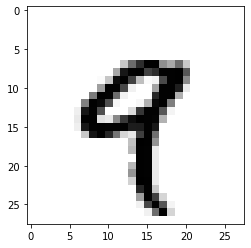

In [69]:
# 다섯번째 이미지 출력하기 2-8
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [71]:
train_labels[4]
# 레이블 정수는 9

9

## 2.2.6 넘파이로 텐서 조작하기
- 슬라이싱: 배열에 있는 특정 원소들을 선택

In [72]:
# 11번째에서 101번쨰까지(101번쨰는 포함X) 숫자를 선택하여(90,28,28)크기의 배열을 만든다
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [74]:
# 배열의 축읗 따라 슬라이싱의 시작 인덱스와 마지막 인덱스를 지정
my_slice = train_images[10:100, :, :]
print(my_slice.shape)
my_slice= train_images[10:100,0:28,0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)


In [76]:
my_slice= train_images[:, 14:, 14:]
my_slice

array([[[240, 253, 253, ...,   0,   0,   0],
        [ 45, 186, 253, ...,   0,   0,   0],
        [  0,  16,  93, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[241, 243, 234, ...,   0,   0,   0],
        [143,  91,  28, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[253, 254, 253, ...,   0,   0,   0],
        [ 72, 192, 254, ...,   0,   0,   0],
        [  0,   6, 242, ...,   0,   0,   0

In [78]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice

array([[[ 49, 238, 253, ...,  93,  82,  82],
        [ 18, 219, 253, ...,   0,   0,   0],
        [  0,  80, 156, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 253, 207,   2],
        [  0,   0,   0, ..., 250, 182,   0],
        [  0,   0,   0, ...,  78,   0,   0]],

       [[  0,   0,   0, ...,  84, 252, 253],
        [  0,   0,   0, ...,  96, 189, 253],
        [  0,   0,   0, ...,  47,  79, 255],
        ...,
        [252, 145,   0, ..., 252, 173,   0],
        [253, 225,   0, ..., 162,   0,   0],
        [252, 249, 146, ...,  56,   0,   0]],

       [[  0,   0,   0, ...,   0,   2, 153],
        [  0,   0,   0, ...,   0,  27, 254],
        [  0,   0,   0, ...,   0, 183, 254],
        ...,
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 254,  57,   0],
        [  0,   0,   0, ..., 255,  94,   0]],

       ...,

       [[  0,   0,   0, ..., 223, 159, 131],
        [  0,   0,   0, ...,  27,   0,   0],
        [  0,   0,  54, ...,   0,   0,   0

## 2.2.7 배치 데이터
- 일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫번째 축(인덱스가 0부터 시작하므로 0번째 축)은 샘플축(sample axis), 샘플차원(sample dimension)
- 딥러닝 모델은 한번에 전체 데이터셋을 처리하지 않음
- 대신 데이터를 작은 배치(batch)로 나눔
- 첫번째 축(0번축)을 배치축 또는 배치차원

In [84]:
batch = train_images[:128]
batch= train_images[128:256]
n=3
batch = train_images[128 * n:128 *(n+1)]

## 2.2.8 텐서의 실제 사례
- 벡터 데이터(sample, features): 크기의 랭크-2텐서, 각 샘플은 수치 속성(특징(feature))으로 구성된 벡터
- 시계열 데이터 또는 시퀀스(sequence)데이터: (samples, timesteps, features)크기의 랭크-3텐서. 각 샘플은 특성 벡터의 (길이가 timesteps인)시퀀스
- 이미지: (sample, height, width, channel) 또는 (sample, channel, height, width) 크기의 랭크-4텐서. 각 샘플은 픽셀의 2D격자고, 각 픽셀은 수치값(채널(chanel))의 벡터
- 동영상: (sample, frame, height, width, channel) 또는 (sample, frame, channel, height, width) 크기의 랭크-5텐서. 각 샘플의 이미지의 (길이가 frames인)시퀀스

## 2.2.9 벡터 데이터
- 하나의 데이터 포인트가 벡터로 인코딩될 수 있으므로 배치데이터는 랭크-2텐서로서 인코딩될 것이다.(즉 벡터의 배열)
- 첫번째 축: 샘플축
- 두번째 축: 특성축(feature axis)

## 2.2.10 시계열 데이터 또는 시퀀스 데이터
- 데이터에서 시간이(또는 연속된 순서가) 중요할 때는 시간 축을 포함하여 랭크-3텐서로 저장됨
- 각 샘플은 벡터(랭크-2텐서)의 시퀀스로 인코딩되므로 배치 데이터는 랭크-3텐서로 인코딩 됨
- 주식가격 데이터셋, 트윗 데이터셋

## 2.2.11 이미지 데이터
- 이미지: 높이, 너비, 컬러 3차원
- 흑백 이미지: (장수, 높이, 너비, 1)=> 랭크-2텐서
- 컬러 이미지: (장수, 높이, 너비, 3)=> 랭크-3텐서

- 이미지 텐서를 지정하는 방식
- 채널 마지막방식: sample, height, width, color_depth 콜로 채널의 깊이를 끝에 놓는다.
- 채널 우선방식: sample, color_depth, height, width 컬러채널의 깊이를 배치 축 바로 뒤에

## 2.2.12 비디오 데이터
- 랭크-5텐서가 필요한 데이터
- 하나의 비디오는 프레임의 연속, 각 프레임은 하나의 컬러 이미지
- 프레임(height, width, color_depth)의 랭크-3텐서로 저장될 수 있기 때문에 
- 프레임의 연속은 (frames, height, width, color_depth)의 랭크-4텐서로 저장될 수 있다.
- 여러 비디오의 배치는(sample, frames, height, width, color_depth)의 랭크-5텐서로 저장될 수 있다.
- (s,f,h,w,c)

# 2.3 신경망의 톱니바퀴: 텐서연산
- 컴퓨터 프로그램을 이진수로 입력처리하는 몇개의 이항연산(AND OR, NOR등)
- 심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 텐서연산(텐서함수)으로 나타낼 수 있음

In [92]:
keras.layers.Dense(512, activation="relu")
# Dense 층을 쌓아 모델을 만듬
# 이 층은 행렬을 입력 받고 입력 텐서의 새로운 표현인 또 다른 행렬을 반환하는 함수
# w: 행렬, b: 벡터

### output = relu(dot(W, input)+b)
- W는 행렬이고, b는 벡터
- 둘 모두 층의 속성

### 3개의 텐서연산
- 입력 텐서와 텐서 W사이의 점곱(dot)
- 점곱으로 만들어진 행렬과 벡터 b사이의 덧셈(+)
- relus(렐루)연산, relu(x)는 max(x,0)

- int(1, x1, x2, x3,,)를 (Σ에 넣고, 시그모이드를 거쳐) 렐루함수를 거쳐서 out
- 1은 b(편향), x1(가중치), x2(가중치) -> (Σ | 시그모이드)=> 활성함수(렐루함수)
- 렐루함수: p. 152그림

## 2.3.1 원소별 연산
- relu함수와 덧셈: 원소별 덧셈(element-wise operation)
- 텐서에 있는 각 원소에 독립적으로 적용됨

In [23]:
# for 반복문
def naive_relu(x):
    assert len(x.shape) ==2
    x= x.copy()
    for i in range(x.shape[0]):
        x[i,j]=max(x[i,j],0)
    return x

In [24]:
# 덧셈
def navie_add(x,y):
    assert len(x.shape) ==2 
    assert s.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        x[i,j]+=y[i,j]
    return x

In [25]:
# 넘파이는 BLAS구현에 복잡한 일들을 위임함
#BLAS는 고도로 병렬화되고 효율적인 저수준의 텐서조작 루틴, 전형적으로 포트란(Fortran)이나 C언어로 구현

In [26]:
# 원소별 연산
import numpy as np

# 원소별 덧셈
z = x+y
#원소별 렐루
z = np.maximum(z,0.)

In [27]:
# 시간차이 재보기
import time
x= np.random.random((20,100))
y= np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
    z = x+y
    z = np.maximum(z,0.)
print("걸린시간: {0:.2f} s". format(time.time() - t0))

걸린시간: 0.00 s


In [28]:
# 단순한 방법
t0 = time.time()
for _ in range(1000):
    z = naive_add(x,y)
    z = navie_relu(z)
print("걸린시간:{0:.2f} s".format(time.time() - t0))

NameError: name 'naive_add' is not defined

# 2.3.2 브로드 캐스팅
- naive_add는 동일한 크기의 랭크-2텐서만 지원함
- 브로드캐스팅: 2단계
- 1. 큰 텐서의 ndim에 맞도록 작은 텐서에(브로드캐스팅 축이라고 부르는) 축이 추가됨
- 2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복

In [29]:
import numpy as np

In [35]:
x=np.random.random((32,10))
y=np.random.random((10,))

In [40]:
# y에 비어있는 첫번쨰 축을 추가하여 크기를 (1, 10)으로 만듦
y = np.expand_dims(y,axis=0)
# y축을 32번 반복하면서 텐서 y의 크기는(32,10)이 됨
Y = np.concatenate([y] * 32, axis=0)

# 이렇게 하면 x,Y의 크기가 같아져서 더할 수 있게 됨

In [41]:
# 단순구현
def navie_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        x[i,j]+=y[j]
    return x

In [44]:
# 크기가 다른 두 텐서에 브로드캐스팅으로 원소별 maximum연산을 적용
import numpy as np

x= np.random.random((64, 3, 32, 10))
y= np.random.random((32, 10))
z= np.maximum(x,y)

## 2.3.3 텐서 곱셈
- 텐서곱셈(tensor product), 점곱(dot product)
- 넘파이에서 텐서 곱셈은 np.dot함수를 사용하여 수행

In [50]:
x= np.random.random((32,))
y= np.random.random((32,))
z= np.dot(x,y)

z= x*y

In [53]:
# 2개의 벡터x와 y의 접곱
def navie_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z=0.
    for i in range(x.shape[0]):
        z+=x[i]*y[i]
    return z

# 두 벡터의 점곱은 스칼라가 되므로 원소 개수가 같은 벡터끼리 점곱이 가능

In [55]:
# 행렬 x와 벡터 y사이에서도 점곱이 가능
def navie_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[1]):
        z[i] += x[i,j] * y[j]
    return z

In [59]:
def navie_matrix_vector_dot(x,y):
    z= np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = navie_vector_dot(x[i, :], y)
    return z

# 두 텐사 증 하나라도 ndim이 1보다 크면 dot연산에 교환법칙이 성립되지 않음
# dot(x,y)와 dot(y,x)가 같지 않다.
# x.shape[1]==y.shape[0]일 때 두 행렬 x와 y의 점곱(dot(x,y))이 성립됨
# x의 행과 y열 사이 벡터 점곱으로 인해 (x.shape[0], y.shape[1])크기의 행렬이 됨

In [60]:
def navie_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0], y.shape[1])
    for i in range(x.shape[1]):
        row_x = x[i, :]
        column_y = y[:, j]
        z[i,j] = naive_vector_dot(row_x, column_y)
    return z

In [ ]:
- 행렬의 접곱
# 크기를 맞추는 동일한 규칙을 따르면 고차원 텐서 간의 접곱을 할 수 있다
(a, b, c, d) · (d,) -> (a, b, c)
(a, b, c, d) · (d, e) -> (a, b, c, e)

# 2.3.4 텐서 크기 변환(tensor reshape)
- 모델에 주입할 숫자 데이터를 전처리할 때 사용
- train_images = train_images.reshape((60000, 28*28))
- 텐서의 크기를 변환하다는 것은 특정 크기에 맞게 열과 행을 재배열.
- 크기가 변환된 텐서는 원래 텐서와 원소 개수가 동일하다.

In [67]:
x= np.array(([0.,1.,],
             [2.,3.,],
             [4.,5.]))

In [69]:
x.shape

(3, 2)

In [72]:
x= x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [75]:
x = x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [77]:
# 전치(transposition): 행렬의 전치는 행과 열을 바꾸는 것
# x[i, :] -> x[:,i]
x= np.zeros((300,20))
x= np.transpose(x)
x.shape

(20, 300)

# 2.3.5 텐서 연산의 기하학적 해석(analysis)
- 좌표 그림

In [79]:
A = [0.5, 1]
B = [1, 0.5]
두 벡터의 덧셈에 대한 기하학적 해석
텐서의 덧셈은 객체를 특정 방향으로 특정 양만큼(객체를 왜곡시키지 않고)이동
- 원래 A점에서 새로운 위치까지 거리와 방향은 벡터 B에 의해 결정됨

In [ ]:
기하학적 연산은 텐서로 표현할 수 있다.
- 이동(translation): (x,y)만큼 (수직,수평)이동
- 회전(rotaion): R= [cos(t)-sin(t)][sin(t) cos(t)] 。[x,y] 각도t만큼 2D벡터를 반시계방향 회전
- 크키변경(scaling): S= [[horizontal_factor, 0], [0, vectical_factor]]와 점곱하여 수직, 수평 방향으로 크기를 변경 = 대각행렬(diagona matrix) 
- 기울이기(skeing)
- 선형변환(linear transform):  크기변경, 회전
- 아핀변환(affine transform): 어떤 행렬과 점곱하여 얻는 선형변환과 (벡터를 더해 얻는) 이동조합 y=w*x+b, relu(W*x+b)
- relu활상화 함수를 사용하는 Dense층: 아핀 변환의 중요한 성질은 여러 아핀변환을 반복래서 적용해도 결국 하나의 아핀 변환이 됨

In [ ]:
## 2.3.6 딥러닝의 기하학적 해석
- 심층 신경망의 각 층은 데이터를 조금씩 풀어주는 변환을 적용하므로, 이런 층을 깊게 쌓으면 아주 복잡한 분해과정을 처리할 수 있음
- 15차원 문제를 1차원으로 하나하나 풀기(훨씬 정확)

# 2.4 신경망의 엔진: 그레이디언트 기반 최적화

In [ ]:
output = relu(dot(W, input)+b)
- 초기: 무작위 초기화
- 가중치가 점진적으로 조정
- 훈련

In [ ]:
1. 훈련 샘플 x와 이에 상응하는 타깃 y_true의 배치를 추출
2. x를 사용하여 모델을 실행하고(정방향 패스(forward pass)단계), 예측 y_pred를 구한다
3. y_pred와 y_true의 차이를 측정하여 이 배치에 대한 모델의 손실을 구한다
4. 배체애 대한 손실이 조금 감소되도록 모델의 모든 가중치를 업데이트 한다
- 훈련 데이터에서 모델의 손실(예측 y_pred, 타깃 y_true)의 오차가 매우 작아질 것이다.

## 2.4.1 도함수란?

In [ ]:
- 연속적이고 매끄러운 함수 
f(x) = y
- 연속적인 함수에서는 x를 조금 바꾸면 y가 조금만 변경된다.
f(x + epsilon_x) = y + a * epsilon_x


미분 = 도함수 = 기울기 = (미분계수) = Gradient(grad)

## 2.4.2 텐서 연산의 도함수: 그레이디언트

- 머신러닝 기반의 예
-- 입력 벡터, x(데이터 셋에 있는 샘플)
-- 행렬, w(모델 가중치)
-- 타깃, y_true(모델이 x에 연관시키기 위해 학습해야 할 값)
-- 손실함수, loss(현재의 예측과 y_true 간의 차이를 측정하기 위해 사용)

-  w를 사용하여 예측 y_pred를 계산하고 그 다음 예측 y_pred와 타깃 y_true사이의 손실 또는 차이를 계산함
y_prepd = dot(w,x)   # 모델 가중치 w를 사용하여 x에 대한 예측을 만든다
loss_value = loss(y_pred, y_true) # 예측이 얼마나 벗어났는지를 추정

- 그레디언트를 사용하여 loss_value가 작아지도록 w를 업데이트 하는 방법
- 고정된 입력 x와 y_true가 있을 때 앞의 연산은 (모델 가중치) w값을 손실 값에 매핑하는 함수로 해석
loss_value =f(w)  # f는 w가 변화할 때 손실 값이 형성하는 곡선(또는 다차원 표면)을 설명

- 현재의 W값을 W0라고 하면 점 W0에서 F의 도함수는 W와 크기가 같은 텐서 grad(loss_value, W0)이다.
- 이 텐서의 각 원소 grad(loss_value, W0)[i,j]가 W0에서 함수 f(W)=loss_value의 그레디언트이다.
- 또는 W0 근처에서 W에 대한 loss_value의 그레디언트이다.

- 편도함수
(입력으로 행렬W를 받는)텐서 연산 grad(f(w),w)는 스카라 함수 grad_ij(f(x), w_ij)의 조합으로 표현할 수 있다
이 스칼라 함수는 W의 다른 모든 가중치가 일정하다고 가정할 때 가중치W[i,j]에 대한 loss_value=f(x)의 도함수를 반환한다.
이때 grad_ij를 W[i,j]에 대한 f의 편도함수(partial derivative)라고 한다.

grad(loss_value, W0)는
가중치를 가진 함수 f(x)의 도함수는 곡선 f의 기울기

grad(loss_value, W0)는 W0에서 loss_value = f(x)가 가장 가파르게 상승하는 바향고 이 방향의 기울기를 나타내는 텐서
편도함수는 f의 특정 방향 기울기를 나타낸다.

따라서 함수 f(x)에 대해서는 도함수의 반대방향으로 x를 조금 움직이면 f(x)의 값을 감소시킬 수 있기 때문이다.
동일한 방식을 적용하면 텐서의 함수 f(x)의 입장에서는 그레디언트의 반대방향으로 W를 움직이면 loss_value=f(x)의 값을 줄일 수 있다.

ex) w1 = w0-step * grad(f(w0), w0)
=> f가 가장 가파르게 상승하는 방향의 반대 방향으로 움직이면 곡선의 낮은위치로 이동하게 된다.
grad(loss_value, w0)는 w0에 아주 가까이 있을 때 기울기를 근사한 것이므로 w0에서 너무 크게 벗어나지 않기 위해 스케일링 비율 step이 필요함. 

Stochastic: 확률적인
robust: 강건한, 어떤 변화에 쉽게 안흔들린다.
: 평균에 새로운 값이 들어와도 값의 큰 변화가 없다.

w1= w0-step*grad(f(wo),w0)

w-=lr*grad

batch=미니배치 
:100개: 20개씩,배치5
배치: 100개 중에 100개를 한꺼번에 다 가져가는 것

1epoch: 한번 수정할때마다 100개씩(w0->w1)
2epochs: 두번째 수정 100개씩 (w1->w2)
w0->w1->w2

100개 다 하지 않고 20개씩 1epoch
첫번째 20개, 두번째 20개씩,,,,5번 반복(업데이트)
epoch 100번 돈다 하면  100*5=500번

## 2.4.3 확률적 경사하강법

In [ ]:
목표
미분 가능한 함수가 주어지면 이론적으로 이 함수의 최솟값을 해석으로 구할 수 있다.
함수의 최솟값은 도함수가 0인 지점.
따라서 도함수가 0 이 되는 지점을 모두 찾고 이중에서 어떤 포인트의 함수값이 가장 작은지 확인

In [ ]:
해결
신경망에 적용: 가장 작은 손실 함수의 값을 만드는 가중치의 조합을 해석으로 찾는 것
=> w0에 대한 식 grad(d(w), w)=0을 풀면 됨
이 식은 N개의 변수로 이루어진 다항식
여기에서의 N은 모델의 가중치 개수
N=2나 N=3인 식을 푸는 것은 가능하지만 신경망에서는 파라미터가 수천 수만개임. 따라서 해결이 어려움.

In [ ]:
이를 해결하기 위해 알고리즘 4단계를 이용
1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y_true를 추출
2. x로 모델을 실행하고 예측 y_pred를 구함 (정방향패스)
3. 이 배치에서 y_pred와 y_true사이의 오차를 측정하여 모델의 손실을 계산
4. 모델 파라미터에 대한 손실 함수의 그레디언트를 계산(역방향 패스)
5. 그레디언트의 반대방향으로 파라미터를 조금씩 이동
ex)  w -= learnig_rate * gradient처럼 하면 배치에 대한 손실이 조금 감소.
(학습률은 경사하갈법 과정의 속도를 조절하는 스칼라 값임)

In [ ]:
미니 배치 확률적 경사하강법(mini-batch stochastic gradient, 미니배치 SGD)
확률적: 각 배치 데이터가 무작위로 선택된다.
한꺼번에 하는 것이 아니라 조각조각내서 한다. (통째로 X)

In [ ]:
learnig_rate 값을 적절히 고르는 것이 중요
이 값이 너무 작으면 곡선을 따라 내려가는데 너무 많은 반복이 필요, 지역최솟값에 갇힐 수도 있음
이 값이 너무 크면 손실 함수 곡선에서 완전히 임의의 위치로 이동시킬 수 있다.

미니배치 sgd알고라즘의 한가지 변종은 반복마다 하나의 샘플과 하나의 타깃을 뽑는 것

극단적인 반대의 경우
가용한 모든 데이터를 사용하여 반복을 실핼할 수 있음 = 배치 경사 하강법
=>  더 정확하게 업데이트 되지만 더 많은 비용이 든다.

절충안: 적절한 미니 배치 사용

In [ ]:
모멘텀(momentum)
sgd에 있는 2개의 문제점인 수렴 속도와 지역 최솟값을 해결

In [ ]:
경사하강법의 목적
손실함수에서 랜덤하게 선택한 가중치를 미분하여 나온 결과를 힌트로 해서 최적해를 찾아가는 것
p.95 그림 2-20같은 그래프처럼 랜덤하게 선택된 가중치가 지역 최솟값에 가까이 있고 지역최솟값에 수렴하면 실제 목표인 전역최솟값을 찾지 못하게 됨

In [ ]:
모멘텀를 사용하여 문제를 피할 수 있음
최적화 과정을 손실 곡선 위로 작은 공을 굴리는 것이라고 생각.
모멘텀이 충분하면 공이 골짜기에 갇히지 않고 전역최솟값에 도달 가능
모멘텀은 현재 기울기 값(현재 속도)뿐만 아니라 (과거의 가속도로 인한) 현재 속도를 함께 고려하여 각 단계애서 공을 움직인다.

실전에 적용할 때에는 현재 그레디언트 값, 이전에 업데이트 한 파라미터에 기초하여 파라미트 w를 업데이트 함

# 2.4.4 도함수 연결: 역전파 알고리즘
- 이전 알고리즘에서 함수가 미분 가능하기 때문에 그레디언트를 쉽게 계산할 수 있다고 가정
- 2개의 층을 가진 모델의 경우 가중치에 대한 손실의 그레디언트를 구현할 방법: 역전파 알고리즘

# 연쇄법칙
- 역전파는 (덧셈, 렐루, 텐서곱셈 같은) 간단한 연산의 도함수를 사용해서 이런 기초적인 연산을 조합한 연산의 그레디언트를 쉽게 계산하는 방법
- 결정적으로 신경망은 서로 연결된 많은 텐서 연산으로 구성
loss_value = loss(y_true, softmax(dot(relu(dot(inputs, w1)+b1), w2)+b2))


loss_value: 1단계~2단계



미적분의 연쇄법칙을 사용하면 이렇게 연결된함수의 도함수를 구할 수 있음
두 함수 f와 g가 있고, 두 함수를 연결한 fg가 있다고 가정
def fg(x):
    x1=g(x)
    y=f(x1)
    return y

연쇄법칙을 사용하면 grad(y,x) == grad(y,x1)* grad(x1,x)가 됨
따라서 f와 g의 도함수를 알고있다면 fg의 도함수를 계산할 수 있음
중간에 함수를 더 추가하면 사슬(chain)처럼 보이기 때문에 연쇄법칙(chain rule)이라 부름
def fghj(x):
    x1=j(x)
    x2=h(x1)
    x3=g(x2)
    y=f(x3)
    return y

grad(y,x) == (grad(y,x3) * grad(x3, x2) *
              grad(x2,x1) * grad(x1, x))

신경망의 그레이디언트 값을 계산하는 데 이연쇄 법칙을 적용하는 것이 역전파 알고리즘이다.


미분을 해보면
f(x)=x**2   x**2 -> 2x => 2(x**2)
g(x)=2x     fg=g(f(x))
2x**2->4x= 4*3 = 12

x=3일때
f(x)=2x  기울기:6
g(x)=2   기울기:2


f(x)=x**2   x**2 -> 2x => 2(x**2)여기서

x**2=t라고 잡으면 2t가 됨

x가 조금 변할때 y가 얼마나 변하는지가 궁금.
d(z)/dx를 미분

- 계산 그래프를 활용한 자동 미분
- 그림2-21 2개의 층으로 구성된 모델의 계산 그래프 표현
loss_val=loss(y_true, softmax(dot(relu(dot(x,w1)+b1)w2)+b2)

- 그림 2-22 간단한 계산 그래프 예(역전파 설명)
loss_val=loss(y_true, (x*w)+b)
              
- 2-23 정방향 패스 실행
- 입력 노드에 구체적인 값 설정, loss_val에 도달할 때 까지 위에서 아래로 그래프의 모든 노드에 전파
loss_val=loss(y_true, (x*w)+b)
x=2, w=3, b=1, y_true=4, loss_val=3
3=loss(4, (2*3)+1)
              
- 그림 2-24 역방향 패스 실행
loss_val= loss(y_true,(x*w) +b)             
grad(x1,w)=2
grad(x2,b)=1
grad(x2, x1)=1
grad(loss_val, x2)=1

- grad(loss_val, x2)=1 x2가 조금 변할 때 loss_val = abs(4-x2) 만큼 변한다   loss_val/x2=1, abs(4-x2)/x2=1
- grad(x2, x1)=1 x1이 조금 변할 때 x2 = x1+b = x1+1 ==x2/x1=1
- grad(x2, b)=1 b가 조금 변할 때 x2= x1+b = 6+b     ==x2/b=1
- grad(x1, w)=2 w가 조금 변할 때 x1= x*w = 2*w      ==x1/w=2


- 그림 2-25 역방향 그래프에서 loss_value부터 W까지의 경로
loss_val= abs_diff(y_true, (w,x))+b
y_true= 4, b=1,w=3, x=2
grad(loss_val, x2)=1
grad(x2, x1)=1
grad(x2, b)=1
grad(x1, w)=2

w가 조금 변할 때의 loss_val의 변화량
w에 대한 손실함수의 변화량
=> loss_val/w

-역방향 그래프에서 관심 대상인 두 노드 a와 b를 연결하는 경로가 여러개라면 모든 경로의 도함수를 더해서 grad(a,b)를 얻을 수 있음
-역전파는 최종 손실 값에서 시작하여 아래층에서 맨 위층까지 거꾸로 거슬러 올라가 각 파라미터가 손실 값에 기여한 정도를 계산한다.
-계산그래프에서 각 노드의 손실 기여도를 역전파 한다.

## 텐서플로의 그레이디언트 테이프
- 텐서플로의 강력한 자동 미분 기능을 활용할 수 있음
- 파이썬의 with문과 함께 사용하여 해당 코드 블록 안의 모든 텐서 연산을 계산 그래프 형태로 기록
- 그래프를 사용해 변수 또는 변수 집합에 대한 어떤 출력의 그레이디언트도 계산 가능

In [221]:
import tensorflow as tf
from keras import layers

In [222]:
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2*x + 3

grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [223]:
# 다차원의 텐서와 함께 사용하기
x = tf.Variable(tf.zeros((2, 2)))
with tf.GradientTape() as tape:
    y = 2*x + 3

grad_of_y_wrt_x = tape.gradient(y, x)
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [224]:
# 변수 리스트의 그레이디언트 계산하기
w = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.random.uniform((2,)))
x = tf.random.uniform((2,2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, w) + b

grad_of_y_wrt_x = tape.gradient(y, [w, b])
grad_of_y_wrt_x

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.5930512, 0.5930512],
        [0.7708831, 0.7708831]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

In [225]:
# Dense층 만들기
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=0.1)
        self.w = tf.Variable(w_initial_value)
        
        b_shape = (output_size, )
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
    
    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.w) + self.b)
    
    @property
    def weights(self):
        return [self.w, self.b]  # 리스트를 묶어서 리턴
    # @는 일종의 예약어 취급하기. 이건 특별한 약속을 하고 있다. 
    # 파이썬에서는 decoration이라고 하고 원래 함수는 weights( ) 이렇게 불렀는데
    # 이건 함수가 아니라 속성을 말하며 weights는 괄호를 안붙이고 부른다.

In [226]:
# Sequential 만들기
class NavieSequential:
    def __init__(self, layers):
        self.layers = layers  # 왼쪽은 새로 만들어지는 변수이다. layers를 받아서 새로운 변수에 넣어줌
    
    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x
    
    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights  # layers들을 순환하면서 가중치를 업데이트 시켜준다.
        return weights

In [227]:
# 모델 구성하기
model = NavieSequential([
    NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
# 512이 인 이유는 위에 512를 받아서 하는거여서.

In [228]:
assert len(model.weights) == 4
# assert는 중간중간에 확인을 하라는 건데 4면 계속 진행하고 아니면 멈춰라 라는것.

In [ ]:
----------------------------------------------------

In [ ]:
# 여기서부터

# 2.5 첫번째 예제 다시 살펴보기
- 층이 서로 연결되어 모델을 구성하고, 모델은 입력 데이터를 예측으로 매핑한다.
- 그다음 손실 함수가 이 예측과 타깃을 비교하여 손실 값을 만든다.
- 즉, 모델의 예측이 기대한 것에 얼마나 잘 맞는지 측정한다.
- 옵티마이저는 이 손실값을 사용하여 모델의 가중치를 업데이트 한다.

In [169]:
# 입력데이터
import tensorflow as tf
# MLP=DNN
import keras
from keras.datasets import mnist
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [170]:
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()
train_images= train_images.reshape((60000, 28*28))
train_images= train_images.astype("float")/255
test_images= test_images.reshape((10000,28*28))
test_images= test_images.astype("float32")/255

# 입력 이미지의 데이터 타입은 float32로, 훈련 데이터는 (60000,784)크기, 테스트 데이터는 (10000,784)크기의 넘파이 배열로 저장됨

In [171]:
model= keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# 이 모델은 2개의 Dense층이 연결되어 있고 각 층은 가중치 텐서를 포함하여 입력 데이터에 대한 몇 개의 간단한 텐서 연산을 적용.
# 층의 속성인 가중치 텐서는 모델이 정보를 저장하는 곳이다.

In [172]:
# 모델 컴파일 단계
model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

# sparse_categorical_crossentropy는 손실함수이다. 
# 가중치 텐서를 학습하기 위한 치드백 신호로 사용되며 훈련하는 동안 최소화 된다.
# 미니 배치 확률적 경사하강법을 통해 손실이 감소된다.
# 경사하강법을 적용하는 구체적인 방식은 첫번째 매개변수로 전달된 rmsprop옵티마이저에 의해 결정된다.

In [173]:
# 반복훈련
model.fit(train_images, train_labels, epochs=5, batch_size=128)

# fit메서드를 호출 했을 때 모델이 128개 샘플의 미니 배치로 훈련 데이터를 5번 반복.
# 전체 훈련 데이터에 수행되는 각 반복을 에포크(epochs)라고 함
# 각 배치에서 모델이 가중치에 대한 손실의 그레이디언트를 계산함
# 이 배테에서 손실 값을 감소시키는 방향으로 가중치를 이동시킴(업데이트 시킴)

#60000/128=469(올림 함)
#1번 배치할 때마다 469번 바꿔준다.
# 총 epochs가 5번 이므로 5*469= 2345번 =총 가중치가 업데이트 되는 횟수

# 이렇게 여러번 반복하면 모델 손실이 충분하게 낮아져서 정확도로 손글씨를 구분할 수 있다.

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2545 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1036 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0680 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0502 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0371 - accuracy: 0.9888


## 2.5.1 텐서플로를 사용하여 첫번째 예제를 밑바닥부터 다시 구현하기

import tensorflow as tf### 단순한 Dense클래스
-output= activation(dot(W,input)+b)

In [174]:
import numpy as np
a = np.array([1,2,3])
a.shape

(3,)

In [175]:
# 간단한 파이썬 클래스 NavieDense를 구현하여 2개의 텐서플로 변수와 W와 b를 만들고 __call__()메서드에서 앞서 언급한 변환을 적용

import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        
        w_shape = (input_size, output_size)    # 랜덤한 값으로 초기화 된 (input_size, output_size) 크기의 행렬 W를 만든다.
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=0.1)
        self.W =tf.Variable(w_initial_value)
        
        b_shape = (output_size, )  #0으로 초기화된 (output_size,)크기의 벡터 b를 만든다.   (output_size,)는 1차원 함수임.
        b_initial_value= tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
        
    def __call__(self, inputs):        #정방향 패스 수행
        return self.activation(tf.matmul(inputs, self.W)+self.b)
    
    @property
    def weights(self):              # 층의 가중치를 추출하기 위한 메서드
        return[self.W, self.b]

### 간단한 Sequential 클래스
- NaiveSequential클래스를 만들어 층을 연결
- 층의 리스트를 받고 __call__()메서드에 입력을 사용하여 층을 순서대로 호출
- 층의 파라미터를 쉽게 구할 수 있도록 weights 속성을 제공

In [176]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers =layers
    
    def __call__(self, inputs):
        x= inputs
        for layers in self.layers:
            x = layer(x)
        return x
    
    @property
    def weights(self):
        weights= []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [177]:
# NaiveDense클래스와 NaiveSequential 클래스를 사용해 케라스와 유사한 모델을 만들 수 있음
model= NaiveSequential([
    NaiveDene(input_size=28*28, output_size=512, activation=tf.nn.relu),
    NaiveDene(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights)==4

In [ ]:
----------------------------------------------------------

In [ ]:
#여기까지 다시 해보깅ㅋ

## 배치 제너레이터

In [229]:
# mnist데이터를 미니 배치로 순회할 방법이 필요
# 배치 제너레이터
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)
        
    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### 2.5.2 훈련스텝 실행하기
- 1. 배치에 있는 이미지에 대해 모델의 예측을 계산합니다.
- 2. 실제 레이블을 사용하여 이 예측의 손실 값을 계산합니다.
- 3. 모델 가중치에 대한 손실의 그레이디언트를 계산합니다.
- 4. 이 그레이디언트의 반대 방향으로 가중치를 조금 이동합니다.

In [230]:
# 텐서플로의 GradientTape객체를 사용
# 정방향 패스 실행
# 훈련 스텝 실행하기
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss
#  update_weights(gradients, model.weights)  가중치 업데이트 단계의 목적은 배치의 손실을 감소시키기 위한 방향으로 가중치를 조금 이동하는 것
# 이동의 크기는 학습률에 의해 결정됨
# 학습률은 작은값임

# update_weights함수 구현하는 가장 간단한 방법은 각 가중치에서 gradient * learning_rate를 빼는 것임

In [231]:
learning_rate = 0.001
def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)   # w = w - learning_rate*g 와 같다.
# 실제로는 이런 방법보단 optimizer 인스턴스를 주로 사용한다.

# 실제로는 이런 가중치 업데이트 단계를 수동으로 구현하는 경우가 거의 없음

In [232]:
# Optimizer 인스턴스 사용하기
from tensorflow.keras import optimizers

optimizers = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizers.apply_gradients(zip(gradients, weights))
# 이제 배치 훈련 스텝이 준비되었다.

In [233]:
# 배치 훈련 스텝 준비 끄읕-! 훈련 에포크 전체 구현 가능

## 2.5.3 전체 훈련 루프
- 훈련 에포크 하나는 단순히 훈련 데이터의 각 배치에 대한 훈련 스텝을 반복하는 것이다.
- 전체 훈련 루프는 단순히 에포크의 반복이다.

In [234]:
# 전체 훈련 루프

def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f'에포크 {epoch_counter}')
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f'{batch_counter}번째 배치 손실: {loss:.2f}')

In [235]:
# 위의 함수 테스트 해보기

from keras import layers

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 4.96
100번째 배치 손실: 2.25
200번째 배치 손실: 2.22
300번째 배치 손실: 2.11
400번째 배치 손실: 2.23
에포크 1
0번째 배치 손실: 1.91
100번째 배치 손실: 1.89
200번째 배치 손실: 1.83
300번째 배치 손실: 1.73
400번째 배치 손실: 1.85
에포크 2
0번째 배치 손실: 1.58
100번째 배치 손실: 1.59
200번째 배치 손실: 1.51
300번째 배치 손실: 1.43
400번째 배치 손실: 1.54
에포크 3
0번째 배치 손실: 1.32
100번째 배치 손실: 1.35
200번째 배치 손실: 1.24
300번째 배치 손실: 1.21
400번째 배치 손실: 1.30
에포크 4
0번째 배치 손실: 1.12
100번째 배치 손실: 1.17
200번째 배치 손실: 1.04
300번째 배치 손실: 1.05
400번째 배치 손실: 1.13
에포크 5
0번째 배치 손실: 0.97
100번째 배치 손실: 1.03
200번째 배치 손실: 0.90
300번째 배치 손실: 0.93
400번째 배치 손실: 1.01
에포크 6
0번째 배치 손실: 0.86
100번째 배치 손실: 0.92
200번째 배치 손실: 0.80
300번째 배치 손실: 0.84
400번째 배치 손실: 0.92
에포크 7
0번째 배치 손실: 0.78
100번째 배치 손실: 0.83
200번째 배치 손실: 0.72
300번째 배치 손실: 0.77
400번째 배치 손실: 0.85
에포크 8
0번째 배치 손실: 0.71
100번째 배치 손실: 0.76
200번째 배치 손실: 0.65
300번째 배치 손실: 0.71
400번째 배치 손실: 0.79
에포크 9
0번째 배치 손실: 0.66
100번째 배치 손실: 0.71
200번째 배치 손실: 0.60
300번째 배치 손실: 0.66
400번째 배치 손실: 0.75


## 2.5.4 모델 평가하기
 - 테스트 이미지에 대한 예측에 armax함수를 적용하고, 예상 레이블과 비교하여 모델을 평가할 수 있다.

In [237]:
# 모델 평가하기

import numpy as np

predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f'정확도: {matches.mean():.2f}')

정확도: 0.82


# 2.6 요약
텐서: 현대 머시러닝 시스템의 기초, 텐서는 dtype, ndim, shape속성을 제공
텐서연산: (덧셈, 텐서 곱셈, 원소별 곱셈)을 통해 수치 텐서를 조작할 수 있음. 이런 연산은 기하학적 변형을 적용하는 것으로 이해할 수 있음.
            일반적으로 딥러닝의 모든 것은 기하학적으로 해석할 수 있음
딥러닝 모델은 가중치 텐서를 매개변수로 받는 간단한 텐서 연산을 연결하여 구성. 모델의 가중치 값을 찾는것을 의미.
학습: 훈련 데이터 샘플과 그에 상응하는 타깃이 주어졌을 때 손실 함수를 최소화 하는 모델의 가중치 값을 찾는것을 의미
데이터 샘플과 타깃의 배치를 랜덤하게 뽑고 이 배치에서 모델 파라미터에 대한 손실의 그레디언트를 계산함으로써 학습이 진행된다.
모델파라미터는 그레디언트의 반대 방향으로 조금씩(학습률에 의해 정의된 크기만큼) 움직인다. 이를 미니배치 경사 하강법이라함
전체 학습과정은 신경망에 있는 모든 텐서 연산이 미분 가능하기 때문에 가능하다.
따라서 현대 파라미터와 배체 데이터를 그레이디언트 값에 매핑해주는 그레이디언트 함수를 구성하기 위해 미분의 연쇄법칙을 사용할 수 있다. 이를 역전파라 함

# 3.5 텐서 플로 시작하기

## 3.5.1 상수 텐서와 변수
- 텐서플루에서 어떤 작업을 하려면 텐서가 필요함.
- 텐서를 만드려면 초깃값이 필요함
- ex) 모두 1이거나 0인 텐서를 만들거나, 랜덤한 분포에서 뽑은 값으로 텐서를 만들 수 있음

In [8]:
# 3-1 모두 1 또는 0인 텐서
import tensorflow as tf
x = tf.ones(shape=(2,1))     # 모두 1로 채운다
print(x)
print()
x = tf.zeros(shape=(2,1))    # 모두 0으로 채운다
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [18]:
# 3-2 랜덤텐서
x = tf.random.normal(shape=(3,1), mean=0., stddev=1.)   # 평균이 0이고, 표준편차가 1인 정규분포에서 랜덤하게 뽑음
print(x)
print()

x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)  # 0과 1사이의 균등분포에서 뽑은 랜덤한 값으로 만든 텐서
print(x)

import numpy as np
np.random.uniform(size=(3,1), low=0., high=1.) # 0과 1사이의 균등분포에서 뽑은 랜덤한 값으로 만든 텐서와 같다.

tf.Tensor(
[[ 0.1035866]
 [ 0.9386085]
 [-1.6206743]], shape=(3, 1), dtype=float32)

tf.Tensor(
[[0.20826745]
 [0.22377706]
 [0.03635454]], shape=(3, 1), dtype=float32)


array([[0.34632755],
       [0.82932956],
       [0.70793396]])

In [23]:
# 3-3 넘파이 배열에 값 할당하기 
import numpy as np
x = np.ones(shape=(2,2))
x[0,0]=0.
x

array([[0., 1.],
       [1., 1.]])

In [25]:
# 3-4 텐서플로 텐서에 값을 할당하지 못함
x = tf.ones(shape=(2,2))
x[0,0]=0.


# 텐서에는 값을 할당할 수 없기 때문에 에러가 발생

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

넘파이 배열과 텐서플로 텐서 사이의 차이점/
텐서플로 텐서에는 값을 할당할 수 없다./
한번 값이 정해지면 수정할 수 없다 (튜플처럼)

In [28]:
# 3-5 텐서플로 변수 만들기 
# 수정 가능한 객체로 바뀌게 해주는 것: tf.Variable(업데이트, 할당 가능하게 해줌)
v =tf.Variable(initial_value=tf.random.normal(shape=(3,1)))  # 만들어둔 객체에 v를 집어 넣음 => 객체가 바뀜
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.52321833],
       [ 0.5378268 ],
       [-1.069336  ]], dtype=float32)>

In [30]:
# 3-6 텐서플로 변수에 값 할당하기
v.assign(tf.ones((3,1)))   # 변수의 상태는 assign메서드로 수정할 수 있음

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [32]:
# 3-7 변수 일부에 값 할당하기
v[0,0].assign(3.)    # 변수의 일부 원소에만 적용 가능

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [38]:
# 3-8 assign_add()사용하기
v.assign_add(tf.ones((3,1)))

# 비슷하게 assign_add()와 assign_sub()은 각 각 +=, -=과 동일하다.

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [39]:
v.assign_sub(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

## 3.5.2 텐서 연산: 텐서 플로에서 수학 계산하기

In [41]:
# 3-9 기본적인 수학 연산
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b+c
e = tf.matmul(a,b)
e*=d

## 3.5.3 GradientTape API 다시 살펴보기
- 미분 가능한 표현이라면 어떤 입력에 대해서도 그레이디언트를 계산할 수 있다.

In [64]:
input_const = tf.constant(3.)
input_const

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [73]:
# 3-10 GradientTape사용하기
# tape.gradient()의 입력텐서가 텐서플로 변수인 경우
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)   #가중치에 대한 모델 손실의 그레이디언트를 계산하는 방법
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [66]:
# 3-11 상수 텐서 입력과 함께 GradientTape 사용하기
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [71]:
# 3-12 그레이디언트 테이프를 중첩라여 이계도 그레이디언트 계산하기
time = tf.Variable()    # (0.)자리를 10, a로 바꾸면 달라짐 해보기
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
acceleration

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[9.8, 9.8],
       [9.8, 9.8]], dtype=float32)>

## 3.5.4 엔드-투-엔드 예제: 텐서플로 선형 분류기
- 선형적으로 잘 구분되는 합성 데이터 만들기
- 2D 평면 포인트로 2개의 클래스를 가짐
- 특정한 평균과 공분산 행렬을 가진 분포에서 좌표 값을 뽑아 각 클래스의 포인트를 생성
- 직관적으로 생각하면 공분산 행렬은 포인트 클라우드의 형태를 결정
- 평균은 평면에서의 위치를 나타낸다.
- 두 포인트 클라우드는 같은 모양을 띠지만 다른 위치에 있을 것이다.

In [79]:
# 3-13 2D평면에 두 클래스의 랜덤한 포인트 생성하기
num_samples_per_class =1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1,0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples =np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5], [0.5,1]],
    size=num_samples_per_class)

In [80]:
# 3-14 두 클래스를 (2000, 2)크기의 한 배열로 쌓기
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[ 1.391724  ,  4.5681868 ],
       [-1.7668972 ,  2.0883968 ],
       [-1.1303006 ,  1.5667733 ],
       ...,
       [ 3.72993   ,  0.12964529],
       [ 2.287796  ,  1.8365082 ],
       [ 2.2010436 ,  0.24846551]], dtype=float32)

In [84]:
# 3-15 (0과 1로 구성된) 타깃 생성하기
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                    np.ones((num_samples_per_class, 1), dtype="float32")))
targets

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

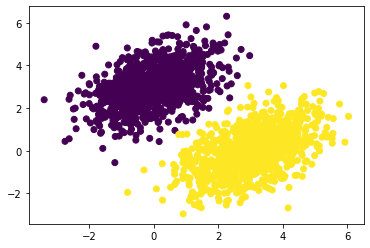

In [85]:
# 3-16 두 클래스의 포인트를 그래프로 그리기
import matplotlib.pyplot as plt

plt.scatter(inputs[:,0], inputs[:,1], c=targets[:, 0])
plt.show()

In [87]:
# 3-17 선형 분류기의 변수 만들기
input_dim =2
output_dim =1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value= tf.zeros(shape=(output_dim,)))

In [88]:
# 3-18 정방향 패스 함수
def model(inputs):
    return tf.matmul(inputs, W)+b

In [89]:
# 3-19 평균 제곱 오차 손실 함수
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [90]:
# 3-20 훈련 스텝 함수
learning_rate = 0.1
def trainging_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [92]:
# 3-21 배치 훈련 루프
for step in range(40):
    loss = trainging_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 1.0513
1번째 스텝의 손실: 0.1036
2번째 스텝의 손실: 0.0884
3번째 스텝의 손실: 0.0819
4번째 스텝의 손실: 0.0768
5번째 스텝의 손실: 0.0723
6번째 스텝의 손실: 0.0682
7번째 스텝의 손실: 0.0644
8번째 스텝의 손실: 0.0609
9번째 스텝의 손실: 0.0578
10번째 스텝의 손실: 0.0549
11번째 스텝의 손실: 0.0523
12번째 스텝의 손실: 0.0499
13번째 스텝의 손실: 0.0477
14번째 스텝의 손실: 0.0457
15번째 스텝의 손실: 0.0438
16번째 스텝의 손실: 0.0422
17번째 스텝의 손실: 0.0406
18번째 스텝의 손실: 0.0392
19번째 스텝의 손실: 0.0380
20번째 스텝의 손실: 0.0368
21번째 스텝의 손실: 0.0358
22번째 스텝의 손실: 0.0348
23번째 스텝의 손실: 0.0339
24번째 스텝의 손실: 0.0331
25번째 스텝의 손실: 0.0324
26번째 스텝의 손실: 0.0317
27번째 스텝의 손실: 0.0311
28번째 스텝의 손실: 0.0305
29번째 스텝의 손실: 0.0300
30번째 스텝의 손실: 0.0295
31번째 스텝의 손실: 0.0291
32번째 스텝의 손실: 0.0287
33번째 스텝의 손실: 0.0283
34번째 스텝의 손실: 0.0280
35번째 스텝의 손실: 0.0277
36번째 스텝의 손실: 0.0275
37번째 스텝의 손실: 0.0272
38번째 스텝의 손실: 0.0270
39번째 스텝의 손실: 0.0268


<function matplotlib.pyplot.show(close=None, block=None)>

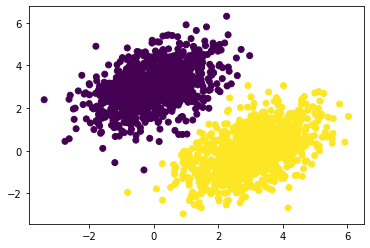

In [93]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

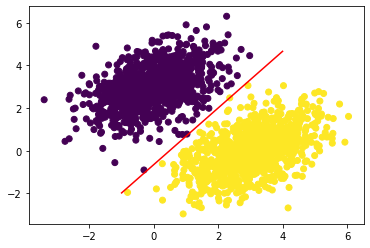

In [94]:
# 직선 그리기
x = np.linspace(-1, 4, 100) # 직선을 그리기 위해 -1~4 사이에 일정한 간격을 가진 100개의 숫자를 생성
y = -W[0] / W[1] * x + (0.5 -b) / W[1]
plt.plot(x, y, "-r")  #"-r"은 빨간색 
plt.scatter(inputs[:, 0], inputs[:, 1], c= predictions[:, 0] > 0.5)
plt.show

# 3.6 신경망의 구조: 핵심 Keras API 이해하기

## 3.6.1 층 : 딥러닝의 구성요소
- 층은 하나 이상의 텐서를 입력으로 받고 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 가중치, 밀집연결층, 완전연결층, 밀집층, 순환층, 합성곱층
- 케라스에서 딥러닝 모델을 만드는 것은 호환되는 층을 서로 연결하여 유용한 데이터 변환 파이프라인을 구성하는 것

In [95]:
### 케라스의 Layer 클래스

In [101]:
# 3-22 Layer의 서브 클래스로 구현한 Dense층
from tensorflow import keras

class SimpleDense(keras.layers.Layer):   # 모든 케라스는 Layer클래스를 상속
    def __init__(self, units, activations=None):
        super().__init__()
        self.units =units
        self.activations = activations
        
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                initializer="zeros")
        
    def call(self, inputs):
        y= tf.matmul(inputs, self.W)+self.b
        if self.activations is not None:
            y = self.activations(y)
        return y

In [102]:
# 클래스의 인스턴스를 생성하면 텐서플로 텐서를 입력으로 받는 함수처럼 사용할 수 있음
my_dense = SimpleDense(units=32, activations= tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [ ]:
이 층을 있는 그대로 호출 했기 때문에, 다시 말해서 __call__()메서드를 사용해 호출했기 때문에
call()과 build()메서드를 왜 구현해야 하는지 궁금?
이유: 때에 맞추어 가중치를 생성해야 하기 때문.

### 자동 크기 추론: 동적으로 층 만들기

In [103]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation ="relu")

In [104]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [106]:
model= NaiveSequential([
    NaiveDense(input_size = 784, output_size = 32, activation = "relu"),
    NaiveDense(input_size = 32, output_size = 64, activation = "relu"),
    NaiveDense(input_size = 64, output_size = 32, activation = "relu"),
    NaiveDense(input_size = 32, output_size = 10, activation = "softmax"),
])

NameError: name 'NaiveSequential' is not defined

# 4장 신경망 시작하기: 분류와 회귀

## 4.1 영화 리뷰 분류: 이진 분류 문제

## 4.1.4 IMDB 데이터셋

In [1]:
# 4-1 IMDB데이터셋 로드
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [2]:
# num_words=1000 매개변수는 훈련 데이터에서 가장 자주 나타나는 단어 1만개 사용하겠다.
# 드물게 나타나는 단어는 무시
# 부정:0, 긍정:1

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
# 가장 자주 등장하는 단어 1만개로 제한했기 때문에 단어인덱스는 9,999개를 넘지 않음
max([max(sequence) for sequence in train_data])

9999

In [6]:
# 4-2 리뷰를 다시 텍스트로 디코딩
word_index = imdb.get_word_index()
reverse_word_indx = dict(
    [(value, key) for (key, value) in word_index.items()])
decorded_review=  " ".join(
    [reverse_word_indx.get(i -3, "?") for i in train_data[0]])
# 0,1,2는 '패딩', '문서시작', '사전에 없음'

## 4.1.2 데이터 준비
- 신결망에 숫자를 바로 주입할 수 없음 숫자 리스트는 모두 길이가 다르지만 신경망은 동일한 크기의 배치를 기대하기 때문
- 리스트를 텐서로 바꾸는 두가지 방법
- 1. 같은 길이가 되도록 리스트 패딩을 추가, 크기의 정수 텐서로 변환, 그 다음 이 정수 텐서를 다룰 수 있는 층으로 신경망을 시작
- 2. 리스트를 멀티-핫인코딩 하여 0과1의 벡터로 변환.

In [7]:
## 4-3 정수 시퀀스를 멀티-핫 인코딩으로 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
# 레이블을 벡터로 바꾸기
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## 4.1.3 신경망 모델 만들기
- 입력 데이터가 벡터고 레이블은 스칼라(1 또는 0)
- 문제에 잘 작동하는 모델은 relu활성화 함수를 사용한 밀집 연결 층을 잘 쌓은 것임
- Dense 층 쌓을 때 중요한 두가지 
- 1. 얼마나 많은 층을 사용할 것인가?
- 2. 각 층에 얼마나 많은 유닛을 둘 것인가?

- 문제
- 16개의 유닛을 가진 2개의 중간 층
- 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세번째 층

In [10]:
# 4-4 모델 정의하기
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(units = 16, activation = "relu"),
    layers.Dense(units = 16, activation = "relu"),
    layers.Dense(units = 1, activation = "sigmoid"),
])

# Dense층에 전달한 첫번째 매개변수는 층의 유닛개수이며, 층이 가진 표현 공간의 차원이다.

# 렐루함수 f(x)=h(x)
f(x) = x (x > 0)
     = x (x <= 0)
    
# 시그모이드 함수 
sigmoid(x) =1/(1+e)-x
e=2.7

# 활성화 함숙가 필요한 이유
relu와 같은 활성화 함수(비선형(non-linearity)함수)가 없다면 Dense층은 선형적안 연산인 점곱과 덧셈 2개로 구성
# output= relu(dot(w,input)+b)
그러므로 이 층은 입력에 대한 아핀만 학습할 수 있음

In [11]:
## 4-5모델 컴파일 하기
# rmsprop옵티마이저와 binary_crossentropy손실 함수로 모델을 설정
model.compile(optimizer="rmsprop",
             loss= "binary_crossentropy",
             metrics=["accuracy"])

In [12]:
## 4.1.4 훈련 검증

In [13]:
# 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 모델을 훈련시킴(훈련 데이터에 있는 모든 샘플에 대해 20번 반복)

In [14]:
# 훈련검증 4-6
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val= y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
# 4-7 모델 훈련하기
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 24ms/step - loss: 0.5416 - accuracy: 0.7723 - val_loss: 0.4058 - val_accuracy: 0.8624
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3242 - accuracy: 0.9004 - val_loss: 0.3322 - val_accuracy: 0.8736
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2367 - accuracy: 0.9263 - val_loss: 0.2844 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1860 - accuracy: 0.9404 - val_loss: 0.2778 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1488 - accuracy: 0.9540 - val_loss: 0.2869 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1212 - accuracy: 0.9613 - val_loss: 0.2996 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0978 - accuracy: 0.9697 - val_loss: 0.3159 - val_accuracy: 0.8806
Epoch 8/20
30

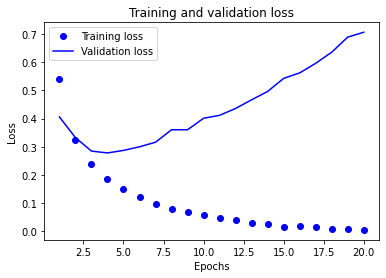

In [16]:
# 4-8 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show() 

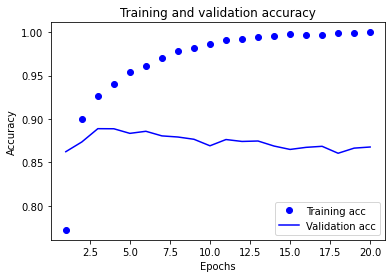

In [17]:
# 4-9 훈련과 검증 정확도 그리기
plt.clf()  #그래프 초기화하기
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show() 

In [18]:
# 4-10 모델 처음부터 다시 훈련하기
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
             loss= "binary_crossentropy",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4331 - accuracy: 0.8237
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2506 - accuracy: 0.9112
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.1979 - accuracy: 0.9292
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2958 - accuracy: 0.8826


In [19]:
results

[0.29584598541259766, 0.8825600147247314]

In [20]:
## 4.1.5 훈련괸 모델로 새로운 모델 데이터에 대해 예측하기
model.predict(x_test)

782/782 [==============================] - 1s 1000us/step


array([[0.20196867],
       [0.9994243 ],
       [0.8910722 ],
       ...,
       [0.21816762],
       [0.07179138],
       [0.5320976 ]], dtype=float32)

In [24]:
# 4.1.6 추가 실험
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="sigmoid"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
             loss= "binary_crossentropy",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 16s 10ms/step - loss: 0.6431 - accuracy: 0.6452
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.4160 - accuracy: 0.8829
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2919 - accuracy: 0.9152
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2880 - accuracy: 0.8886


In [25]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.19266908],
       [0.96382725],
       [0.93334514],
       ...,
       [0.14233485],
       [0.12644468],
       [0.43455926]], dtype=float32)

In [ ]:
--------------------------------------------------------------------

In [26]:
# 추가 실험
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
             loss= "mse",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 9ms/step - loss: 0.2084 - accuracy: 0.0033
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1372 - accuracy: 0.0040
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.0899 - accuracy: 0.0226
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.0869 - accuracy: 0.0534


In [27]:
model.predict(x_test)

782/782 [==============================] - 2s 1ms/step


array([[0.22478239, 0.14848131, 0.08719953, ..., 0.14023608, 0.06072513,
        0.17325895],
       [0.9116101 , 0.99360913, 0.99857485, ..., 0.990042  , 0.99932617,
        0.99649036],
       [0.758169  , 0.8832995 , 0.93231785, ..., 0.8549452 , 0.9698972 ,
        0.93586284],
       ...,
       [0.22255367, 0.16054395, 0.09698723, ..., 0.1482987 , 0.05990888,
        0.16157305],
       [0.15589958, 0.08325098, 0.04398393, ..., 0.08272775, 0.02826785,
        0.1128445 ],
       [0.47498542, 0.52096033, 0.46370107, ..., 0.4603784 , 0.5183181 ,
        0.590542  ]], dtype=float32)

In [28]:
# 추가 실험
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
             loss= "binary_crossentropy",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results= model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 8ms/step - loss: 0.4221 - accuracy: 0.8304
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2403 - accuracy: 0.9136
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1798 - accuracy: 0.9349
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3170 - accuracy: 0.8788


In [29]:
model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.09335426],
       [0.9971033 ],
       [0.85677177],
       ...,
       [0.21504785],
       [0.03518954],
       [0.67698246]], dtype=float32)

# 4.2 뉴스기사분류: 다중 분류 문제
- 다중 분류(multiclass classification)
- 단일 레이블 다중 분류(single-label, multiclass classification)
- 다중 레이블 다중 분류(multi-label, multiclass classification)

In [30]:
##  4.2.1 로이터 데이터셋
# 코드 4-11 로이터 데이터셋 로드하기
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# 매개변수 데이터는 자주 등장하는 10000개로 제한

In [31]:
len(train_data)

8982

In [32]:
len(test_data)

2246

In [33]:
# 정수 리스트(단어 인덱스)
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [34]:
# 코드 4-12 로이터 데이터 셋을 텍스트로 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]])

In [35]:
train_labels[0]

3

In [36]:
## 4.2.2 데이터 준비
# 데이터를 벡터로 변환
# 코드 4-13 데이터 인코딩하기
x_train =vectorize_sequences(train_data)
x_test =vectorize_sequences(test_data)

In [ ]:
# 레이블을 벡터로 바꾸는 방법2
- 1. 레이블 리스트를 정수 텐서로 변환
- 2. 원-핫 인코딩
- 원-핫인코딩은 각 레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터

In [38]:
# 코드 4-14 레이블 인코딩하기
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels) 

In [39]:
# 케라스 내장함수
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [40]:
## 4.2.3 모델 구성
# 코드 4-15 모델 정의
model= keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

In [ ]:
# 주의
- 마지막 Dense층의 크기가 46: 각 입력 샘플에 대해 46차원의 벡터를 출력한다. 이 벡터의 각 원소(각 차원)는 각기 다른 출력 클래스가 인코딩 된 것
- 마지막 층에 softmax활성화 함수가 사용. 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률. 46개의 값을 모두 더하면 1이 됨

In [ ]:
# categorical_crossentropy(손실함수)는 두 확률 분포 사이의 거리를 측정한다.
모델이 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리
두 분포 사시의 거리를 최소화 함으로써 진짜 레이블에 가까운 출력물을 내도록 훈련한다.

In [41]:
# 코드 4-16 모델 컴파일 하기
model.compile(optimizer = "rmsprop",
             loss ="categorical_crossentropy",
             metrics=["accuracy"])

## 4.2.4 훈련 검증

In [42]:
## 코드 4-17 검증 세트 준비하기

In [43]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [44]:
# 코드 4-18 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 7s 27ms/step - loss: 2.4799 - accuracy: 0.5362 - val_loss: 1.6487 - val_accuracy: 0.6560
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3743 - accuracy: 0.7061 - val_loss: 1.2951 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0357 - accuracy: 0.7774 - val_loss: 1.1209 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8167 - accuracy: 0.8240 - val_loss: 1.0246 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6441 - accuracy: 0.8682 - val_loss: 0.9642 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5124 - accuracy: 0.8961 - val_loss: 0.9504 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4112 - accuracy: 0.9187 - val_loss: 0.9036 - val_accuracy: 0.8180
Epoch 8/20
16

## 코드 4-19 훈련 검증 손실 그리기

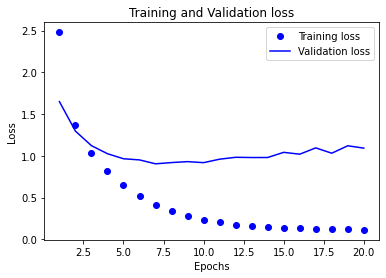

In [45]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label= "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 코드 4-20 훈련과 검증 정확도 그리기

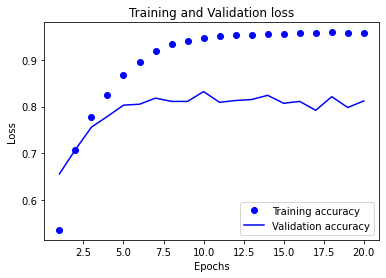

In [46]:
plt.clf()# 그래프 초기화
acc = history.history["accuracy"]
val_acc= history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation accuracy")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 4-21 모델을 처음부터 다시 훈련

In [47]:
model= keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax"),
])

model.compile(optimizer = "rmsprop",
             loss ="categorical_crossentropy",
             metrics=["accuracy"])

model.fit(x_train,
          y_train,
          epochs=9,
          batch_size = 512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 2.5560 - accuracy: 0.5194
Epoch 2/9
18/18 [==============================] - 0s 17ms/step - loss: 1.3885 - accuracy: 0.7112
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.0203 - accuracy: 0.7832
Epoch 4/9
18/18 [==============================] - 0s 12ms/step - loss: 0.7871 - accuracy: 0.8372
Epoch 5/9
18/18 [==============================] - 0s 13ms/step - loss: 0.6167 - accuracy: 0.8747
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4873 - accuracy: 0.8975
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3906 - accuracy: 0.9179
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3206 - accuracy: 0.9293
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9573 - accuracy: 0.7961


In [48]:
results 

[0.9573230147361755, 0.7960819005966187]

In [49]:
# 랜덤한 분류기를 사용해 예측
import copy 
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.188780053428317

In [50]:
## 4.2.5 새로운 데이터에 대해 예측
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 1ms/step


(46,)

In [51]:
np.sum(predictions[0])

1.0

In [52]:
np.argmax(predictions[0])

3

## 4.2.6 레이블과 손실을 다루는 다른 방법

In [53]:
# 정수 텐서로 변환
y_train= np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer="rmsprop",
             loss= "sparse_categorical_crossentropy",
             metrics=["accuracy"])

## 4.2.7 충분히 큰 중간층을 두어야 하는 이유

In [54]:
# 병목이 나타남
model = keras.Sequential([
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=4, activation='relu'),
    layers.Dense(units=46, activation='softmax'),
])
# 모델 컴파일 4-16
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics='accuracy')

history = model.fit(partial_x_train, partial_y_train,
          epochs=20, batch_size =128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.7640 - accuracy: 0.4245 - val_loss: 2.0304 - val_accuracy: 0.5580
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 1.7282 - accuracy: 0.5896 - val_loss: 1.5903 - val_accuracy: 0.6080
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3700 - accuracy: 0.6569 - val_loss: 1.4278 - val_accuracy: 0.6530
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 1.1625 - accuracy: 0.7040 - val_loss: 1.3553 - val_accuracy: 0.6680
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 1.0093 - accuracy: 0.7331 - val_loss: 1.3115 - val_accuracy: 0.6770
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.8897 - accuracy: 0.7825 - val_loss: 1.2868 - val_accuracy: 0.7060
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.8024 - accuracy: 0.8058 - val_loss: 1.2941 - val_accuracy: 0.7180
Epoch 8/20
63/63 [=

# 4.3 주택 가격 예측: 회귀 문제

## 4.3.1 보스턴 주택 가격 데이터 셋

In [55]:
# 4-23 보스턴 주택 데이터 셋 로드
# 1. 데이터 준비
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [56]:
# 데이터 살펴보기
print(train_data.shape)
test_data.shape

(404, 13)


(102, 13)

In [57]:
# 402개의 훈련 샘플, 102개의 테스트 샘플이 있고, 13개의 수치 특성이 있다.
# 타깃은 주택의 중간 가격으로 천달러 단위임
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

# 4.3.2 데이터 준비

In [58]:
# 특성별로 정규화 하는 것
# 입력 데이터에 있는 각 특성(입력 데이터 행렬의 열)에 대해 특성의 평균을 빼고 표준편차로 나눈다.
# 특성의 중앙이 0근처에 맞추어지고 표준편차가 1이 됨

In [59]:
# 4-2 데이터 정규화 하기
# 2. 데이터 처리(전처리)
mean= train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -=mean
test_data /= std

In [60]:
# 주의
# 절대로 테스트 데이터에 계산한 어떠한 값도 사용해서 안됨

## 4.3.3 모델 구성

In [61]:
# 3. 모델만들기(정의하기) 
import keras

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation = "relu"),
        layers.Dense(64, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer = "rmsprop", loss= "mse", metrics=["mae"])
    return model

## 4.3.4 K-겹 검증을 사용한 훈련 검증

In [62]:
# 4-26 K-겹 검증하기
import numpy as np
import keras


k= 4
num_val_samples =len(train_data)//k
num_epochs = 100
all_scores=[]
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i+1)* num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1)* num_val_samples]
    partia_train_data = np.concatenate(
    [train_data[:i* num_val_samples],
     train_data[(i + 1)*num_val_samples:]],
        axis=0)
    partia_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
model = build_model()
model.fit(partia_train_data, partia_train_targets,
         epochs = num_epochs, batch_size=16, verbose=0)
val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [63]:
# num_epochs=100으로 실행
all_scores

[2.3470988273620605]

In [64]:
np.mean(all_scores)

2.3470988273620605

In [65]:
# 4-27 각 폴드의 검중 점수 저장하기
num_epochs =500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i* num_val_samples: (i+1)*num_val_samples]
    partia_train_data= np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i+1)*num_val_samples:]],
    axis=0)
partia_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
model = build_model()
history = model.fit(partia_train_data, partia_train_targets,
                   validation_data=(val_data, val_targets),
                   epochs=num_epochs, batch_size=16, verbose=0)
mae_histoy = history.history['val_mae']
all_mae_histories.append(mae_histoy)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [187]:
mae_history = history.history['val_mae']
print(mae_history[:10])
    
all_mae_histories.append(mae_history)
print(all_mae_histories[:3])

[21.251785278320312, 17.952741622924805, 13.450610160827637, 8.934240341186523, 6.457298278808594, 5.276968955993652, 4.506893634796143, 4.197632789611816, 3.8989779949188232, 3.681535005569458]
[[17.208391189575195, 13.68774700164795, 9.505520820617676, 5.863607883453369, 4.744641304016113, 4.156180381774902, 3.705875873565674, 3.360576629638672, 3.250675916671753, 2.9229626655578613, 2.9160819053649902, 2.902553081512451, 2.802931308746338, 2.6277859210968018, 2.514071226119995, 2.505136489868164, 2.33263897895813, 2.305694818496704, 2.1962380409240723, 2.2477657794952393, 2.15116024017334, 2.458343505859375, 2.065349578857422, 2.011779308319092, 2.1303935050964355, 1.9415124654769897, 1.9363327026367188, 1.9260127544403076, 1.884361982345581, 1.986196517944336, 1.9698623418807983, 1.9495885372161865, 1.8983482122421265, 1.8757059574127197, 2.0055971145629883, 2.026499032974243, 1.8379371166229248, 1.8265125751495361, 1.8375465869903564, 1.847381830215454, 1.8221992254257202, 1.79924

In [66]:
# 4-28 k-겹 검증 점수 평균 기록
average_mae_history=[
        np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

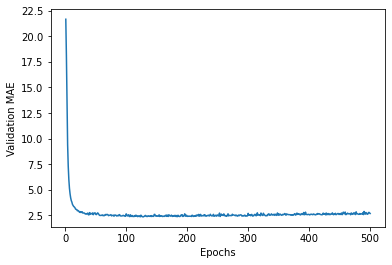

In [67]:
# 4-29 검증 점수 그래프 그리기
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

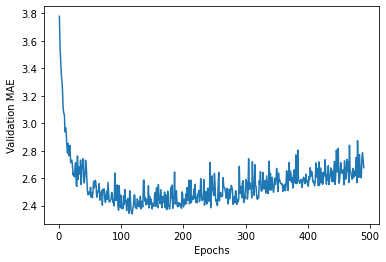

In [68]:
# 나머지 곡선 부분과 스케일이 크게 다른 처음 10개의 데이터 포인트 제외 시키기
# 4-30 처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history)+1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [69]:
# 140번째 에포크 이후에 줄어드는 것이 멈춤. 이 지점 이후로는 과대적합이 시작됨

In [70]:
# 4-31 최종 모델 훈련하기
model = build_model()
model.fit(train_data, train_targets,
         epochs= 130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 13.4363 - mae: 2.5128


In [71]:
test_mae_score

2.5128090381622314

## 4.3.5 새로운 데이터에 대해 예측하기
- 이진분류 모델에서 predict() 메서드를 호출할 때 각 샘플에 대해 0과 1사이의 스칼라 점수가 반환되었다. 
- 다중분류 모델이므로 각 샘플마다 클래스에 대한 확률 분포릉 얻었다.
- 이제 스칼라 회귀 모델의 predict()메서드를 사용하여 새로운 샘플의 가격을 1,000달러 단위로 예측할 수 있다.

In [ ]:
predictions = model.predict(test_data)
prediction[0]

# 답은 array([9.990133], dtype = float32)
# 테스트 세트에 있는 첫번째 주택의 가격은 약 1만 달러로 예상됨

In [ ]:
## 4.3.6 정리
- 회귀는 분류에서 사용했던 것과는 다른 손실 함수를 사용한다. 평균 제곱오차(mse)는 회귀에서 자주 사용되는 손실함수이다
- 비슷하게 회귀에서 사용되는 평가지표는 분류와 다르다. 당연히 정확도 개념은 회귀에 적용되지 않는다. 일반적인 회귀지표는 평균절대오차(mae)이다.
- 입력 데이터의 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일 조정 해야한다.
- 가용한 데이터가 적다면 k-겹 검증을 사용하는 것이 신뢰할 수 있는 모델 평가 방법이다.
- 가용한 훈련데이터가 적다면 과대적합을 피하기 위해 중간층의 수를 줄인 작은 모델을 사용하는 것이 좋다. (일반적으로 1개, 2개)

In [ ]:
## 4.4 요약
- 벡터 데이터를 사용하는 가장 일반적인 머시러닝 작업은 이진분류, 다중분류, 스칼라 회귀이다.
- 보통 원본 데이터를 신경망에 주입하기 전에 전처리 해야 함
- 데이터에 범위가 다른 특성이 있다면 전처리 단계에서 각 특성을 독립적으로 스케일 조정해야 함
- 훈련이 진행됨에 따라 신경망의 과대적합이 시작되고 새로운 데이터에 대해 나쁜 결과를 얻게 됨
- 훈련 데이터가 많지 않으면 과대적합을 피하기 위해 1개, 2개의 중간층을 가진 모델을 사용
- 데이터가 많은 범주로 나뉘어 있을 때 중간층이 너무 작으면 정보의 병목이 생길 수 있다.
- 데이터 양이 적을 때는 k-겹 검증이 신뢰할 수 있는 모델 평가를 도와준다.

# 11.24 p.172~178

all_mae_histories[0][0]
all_mae_histories[1][0]
all_mae_histories[2][0]
all_mae_histories[3][0]
all_mae_histories[4][0]

all_mae_histories[0][1]
all_mae_histories[1][1]
all_mae_histories[2][1]
all_mae_histories[3][1]
all_mae_histories[4][1]

all_mae_histories[0][2]
all_mae_histories[1][2]
all_mae_histories[2][2]
all_mae_histories[3][2]
all_mae_histories[4][2]

In [170]:
# 방법1
a_m_h = []
for i in range(num_epochs):
    each_epoch = []
    for x in all_mae_histories:
        each_epoch.append(x[i])
    a_m_h.append(np.mean(each_epoch)) 
print(mae_history)

[21.251785278320312, 17.952741622924805, 13.450610160827637, 8.934240341186523, 6.457298278808594, 5.276968955993652, 4.506893634796143, 4.197632789611816, 3.8989779949188232, 3.681535005569458, 3.5456976890563965, 3.384284257888794, 3.2831192016601562, 3.1660523414611816, 3.1767077445983887, 3.147764205932617, 2.9752626419067383, 2.942695140838623, 2.8524012565612793, 2.8611092567443848, 2.9858574867248535, 2.8838586807250977, 2.7284018993377686, 2.795139789581299, 2.7944087982177734, 2.839743137359619, 2.698698043823242, 2.7022316455841064, 2.6903305053710938, 2.755497455596924, 2.7379870414733887, 2.8805737495422363, 2.7204298973083496, 2.623520612716675, 2.7626218795776367, 2.8740596771240234, 2.6781322956085205, 2.72151517868042, 2.7244038581848145, 2.744626998901367, 2.6313834190368652, 2.6625304222106934, 2.7194926738739014, 2.6594223976135254, 2.6553401947021484, 2.6415421962738037, 2.660891056060791, 2.8110060691833496, 2.7115135192871094, 2.728978157043457, 2.716287612915039,

In [171]:
# 방법2
all_avg_mae=[]
for i in range(100):
    for mae_history in all_mae_histories:
        all_mae = []
        all_mae = mae_history[i]
        all_avg_mae.append(np.mean(all_mae))
        print(all_mae)

17.208391189575195
20.92072105407715
19.360095977783203
19.283939361572266
21.251785278320312
13.68774700164795
17.07221794128418
15.988276481628418
15.728100776672363
17.952741622924805
9.505520820617676
12.23686408996582
11.548440933227539
11.411537170410156
13.450610160827637
5.863607883453369
8.238418579101562
7.525996208190918
7.214821815490723
8.934240341186523
4.744641304016113
5.986262798309326
5.50496768951416
5.417281150817871
6.457298278808594
4.156180381774902
4.938127517700195
4.246429443359375
4.543072700500488
5.276968955993652
3.705875873565674
4.483839988708496
3.5427780151367188
3.9631569385528564
4.506893634796143
3.360576629638672
3.9760003089904785
3.2186503410339355
3.648258686065674
4.197632789611816
3.250675916671753
3.881664276123047
3.059584856033325
3.470313310623169
3.8989779949188232
2.9229626655578613
3.6494553089141846
2.9463775157928467
3.3942089080810547
3.681535005569458
2.9160819053649902
3.59788179397583
2.8235325813293457
3.1797385215759277
3.545697

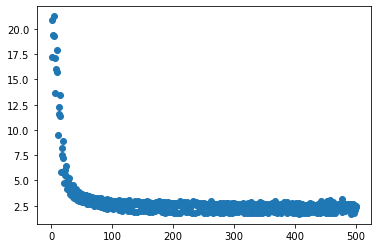

In [178]:
plt.scatter(range(1,501),all_avg_mae)

In [179]:
model = build_model()
model.fit(train_data, train_targets,
         epochs = 130,  batch_size=16, verbose=0)
test_mse_score, test_mae_score =model.evaluate(test_data, test_targets)

test_mae_score
# 값이 적을수록 좋은 것임

4/4 [==============================] - 0s 998us/step - loss: 17.0552 - mae: 2.8920


2.8919928073883057

train_x: data: 13개의 변수
test_y: target: 집값

In [181]:
model.predict(test_data)[0]

4/4 [==============================] - 0s 811us/step


array([9.963131], dtype=float32)

In [ ]:
--------------------------------------------------

# 5. 머신러닝의 기본요소

In [19]:
# 5-1 mnist에 백색 잡음 픽셀과 0픽셀 추가하기
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [20]:
# 5-2 백색 잡음과 0을추가한 mnist데이터에서 모델 훈련하기
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model=keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
    return model

model=get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model=get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.6452 - accuracy: 0.8106 - val_loss: 0.3376 - val_accuracy: 0.8920
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2526 - accuracy: 0.9212 - val_loss: 0.2931 - val_accuracy: 0.9053
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1635 - accuracy: 0.9484 - val_loss: 0.1765 - val_accuracy: 0.9441
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1146 - accuracy: 0.9652 - val_loss: 0.1470 - val_accuracy: 0.9539
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0849 - accuracy: 0.9735 - val_loss: 0.1245 - val_accuracy: 0.9633
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0628 - accuracy: 0.9803 - val_loss: 0.1321 - val_accuracy: 0.9619
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.1824 - val_accuracy: 0.9457
Epoch 

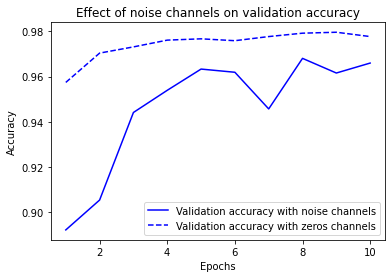

In [21]:
# 5-3 검증 정확도 비교 그래프 그리기
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs= range(1,11)
plt.plot(epochs, val_acc_noise, "b-",
        label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
        label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
두 경우 모두 동일한 정보를 가진 데이터지만 잡음이 섞인 데이터에서 훈련된 모델의 검증 정확도가 1퍼센트 포인트 정도 낮다.
이는 가짜 상관관계의 영향 때문이다.
잡음을 더 많이 섞을수록 정확도는 더 감소될 것이다.

상관이 없는 것은 넣지 말아야한다. 가짜가 많아지면 정확도는 떨어진다.
원본데이터에 상관관계가 없는 데이터를 넣은 것은 유익하지 않다.
상관관계가 있는 데이터를 넣어야 정확도가 높아진다
- 질 좋은 데이터 조금 > 상관관계 없는 데이터 많이


## 5.1.2 딥러닝에서 일반화의 본질
- 표현 능력이 충분하다면 어떤 것에도 맞추도록 훈련할 수 있다.
- 입력과 뒤섞은 레이블 사이에 아무런 관계가 없지만 비교적 작은 모델에서도 훈련손실이 잘 감소됨
- 일반화가 없기 때문에 검증 손실은 시간이 지남에 따라 향상되지 않음

- accuracy를 올리는 방법
- 1. 데이터의 개수가 충분한가
- 2. 오분류 된 것이 있는가 등을 살펴보아야 한다.

In [22]:
# 5-4 랜덤하게 섞은 레이블로 MNIST모델 훈련하기
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") /255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(train_images, random_train_labels,
         epochs =100,
         batch_size=128,
         validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3181 - accuracy: 0.1032 - val_loss: 2.3068 - val_accuracy: 0.1042
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2999 - accuracy: 0.1191 - val_loss: 2.3151 - val_accuracy: 0.1084
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2899 - accuracy: 0.1283 - val_loss: 2.3157 - val_accuracy: 0.1042
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2757 - accuracy: 0.1430 - val_loss: 2.3261 - val_accuracy: 0.1072
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2590 - accuracy: 0.1549 - val_loss: 2.3353 - val_accuracy: 0.1086
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2377 - accuracy: 0.1702 - val_loss: 2.3511 - val_accuracy: 0.1082
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2141 - accuracy: 0.1851 - val_loss: 2.3655 - val_accuracy: 0.1032

In [ ]:
## 일반화의 원천인 보간
- 공간 안의 샘플만 사용해서 공간 전체를 이해할 수 있다. 보간을 사용해서 빈곳을 채울 수 있기 때문

In [ ]:
선형보간과 잠재매니폴드 보간 사이의 차이
숫자의 잠재매니폴드에서 모든 포인트는 유효한 숫자가 되지만 일반적으로 두 숫자를 평균하면 유효한 숫자가 됨

In [ ]:
지역일반화: 보간은 이전에 본 것과 매우 가까운 것을 이해하는 데 도움을 줄 수 있을 뿐이다.
사람은 보간 이외의 이니 메커니즘으로 궁극일반화를 할 수 있다.
인지 메커니즘은 추상화, 세상에 대한 상징적 모델, 추론, 논리, 상식, 일반적으로 이성이라고 부르는 세상에 대한 선천적 능력 등을 말하며
직관이나 패턴인식과는 다르다.

In [ ]:
### 딥라닝이 작동하는 이유
딥러닝 모델은 근본적으로 매우 고차원의 곡선이다.
미분할 수 있어야 하기 때문에 매끄럽고 연속적인 곡선이다.
경사하강법을 통해 이 곡선을 부드럽고 점진적으로 데이터 포인트에 맞춘다.

-모델이 훈련 입력 사이를 보간하여 이전에 본 적 없는 입력을 이해할 수 있다.
- 잠재 매니폴드를 학습하는 데 잘 맞는 속성
-- 딥러닝 모델은 입력에서부터 출력으로 매끄럽고 연속적인 매핑을 구현함
    필수적으로 미분이 가능해야 하기 때문에 매끄업고 연속적이어야한다.
    그렇지 않으면 경사하강법을 사용할 수 없음.
    이런 매끄러움은 동일한 속성을 가진 잠재 매니폴드를 근사하는 데 도움이 된다.

In [ ]:
### 가장 중요한 훈련데이터
딥러닝이 실제로 매니폴드 학습에 잘 맞지만 일반화 능력은 모델의 어떤 속성 때문이라기 보다 데이터의 자연적인 구조로 인한 결과이다.
데이터가 보간할 수 있는 매니폴드를 형성하는 경우에만 일반화할 수 있다.
특성이 유익하고 잡음이 적을 수록 입력 공간이 더 간단하고 구조적이기 때문에 더 잘 일반화 할 수 있다.
데이터 큐레이션, 특성공학은 일반화에 필수적이다.

딥러닝 곡선을 잘 맞추기 위해 입력공간을 조밀히게 샘플링 하여 훈련해야함(조밀한 샘플링)
충분히 조밀하게 샘플링 하면 상식, 요약, 추론 또는 세상에 대한 외부 지식을 사용하지 않아도 훈련 입력 사이를 보간하여 새로운 입력을 이해할 수 있다.

따라서 딥러닝 모델을 향상시키는 가장 좋은 방법은 더 좋고, 더 많은 데이터를 훈련하는 것.

In [ ]:
# 5.2 머신러닝 모델 평가

In [ ]:
## 5.2.1 훈련, 검증, 테스트 세트
모델 평가의 핵심은 가용한 데이터를 항상 훈련, 검증, 테스트 3개의 세트로 나누는 것이다.
훈련: 모델을 훈련
검증: 검증 세트에서 모델을 평가
모델을 출시할 준비가 되면 테스트 세트에서 최종적으로 딱 한번 모델을 테스트 한다.
테스트 데이터는 가능한 제품 환경의 데이터와 비슷해야 한다. 그 다음 모델을 제품환경에 배포.

검증세트의 성능을 기반으로 모델의 설정을 튜닝하면 검증 세트로 모델의 직접 훈련하지 않더라도 빠르게 검증 세트에 과대적합이 될 수 있다.
정보누설
검증세트의 모델 성능에 기반하여 모델의 하이퍼파라미터를 조정할 때마다 검증 데이터에 관한 정보가 모델로 새는 것
하나의 파라미터에 대해 단 한번만 튜닝한다면 아주 적은 정보가 누설될 것이다.
모델을 조정하는과정을 여러번 반복하면 검증세트에 관한 정보를 모델에 많이 노출시키게 됨

데이터가 적을때 도움이 되는 것
단순 홀드아웃 검증, k-겹 교차검증, 셔플링을 사용한 반복k-겹 교차검증

In [ ]:
### 단순홀드아웃 검증
# 5-5 홀드아웃 검증 구현 예시
num_validation_samples =10000
np.random.shuffle(data)
validation_data = data[:num_validation_samples]
training_data = data[num_validation_samples:]

modle= get_model()
model.fit(training_data,...)
validation_score = model.evaluate(validation_data, ...)

model= get_model()
model.fit(np.concatenate([training_data, validation_data]),...)
test_score = model.evaluate(test_data,...)

In [ ]:
이 방법의 단점
데이터가 적을 때는 검증 세트와 테스트 세트의 샘플이 너무 적어 주어진 전체 데이터를 통계적으로 대표하지 못할 수 있음

In [ ]:
### k-겹 교차 검증
데이터를 동일한 크기를 가진 k개의 분할로 나누어줌
각분할 i에 대해 남은 k 1개의 분할로 모델을 훈련하고 분할 i에서 모델을 평가
최종 점수는 이렇게 얻은 k개의 점수를 평균한다.
이 방법은 모델의 성능이 데이터 분할에 따라 편차가 클 때 도움이 된다.

In [ ]:
# 5-6 k-겹 교차 검증  구현 예
k=3
num_validation_samples= len(data)//k
np.random.shuffle(data)
validation_scores=[]
for fold in range(k):
    validation_data = data[num_validation_samples * fold:
                          num_validation_samples * (fold+1)]
    training_data = np.concatenate(
        data[:num_validation_samples * fold],
        data[num_validation_samples * (fold + 1):])
    model = get_model()
    model.fit(training_data,...)
    validation_score = model.evaluate(validation_data,...)
    validation_scores.append(validation_score)
    validation_score= np.average(validation_scores)
model= get_model()
model.fit(data, ...)
test_score = model.evaluate(test_data,...)

In [ ]:
### 셔플링을 사용한 반복 k-겹 교차 검증
비교적 가용 데이터가 적고 가능한 정확학 모델을 평가하고자 할 때 사용
k-겹 교차 검증을 여러번 적용하되 k개의 분할로 나누기 전에 매번 데이터를 무작위로 섞는다.
최종 점수는 모든 k-겹 교차 검증을 실행해서 얻은 점수의 평균이 됨
결국 p*K개(p는 반복 횟수)의 모델을 훈련하고 평가하므로 비용이 매우 많이 든다.

In [ ]:
## 5.2.2 상식 수준의 기준점 넘기
평행 세계에 있는 로켓을 발사하는 버튼을 누르는 것과 비슷
이 기준점은 랜덤한 분류기의 성능이거나 머신러닝을 사용하지 않고 생각할 수 있는 가장 간단한 방법
상식 수준의 기준점을 가지는 것이 필수적이다.

In [ ]:
## 5.2.3 모델 평가에 대해 유념해야할 점
대표성 있는 데이터: 훈련 세트와 테스트 세트로 나누기 전에 데이터를 무작위로 섞는 것이 일반적이다.
시간의 방향
데이터 중복

# 5.3 훈련성능 향상하기

In [19]:
# 5-7
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np 

In [25]:
# 5-7 잘못된 높은 학습률로 MNIST모델 훈련하기
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2) 

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 1044.6927 - accuracy: 0.3988 - val_loss: 2.8790 - val_accuracy: 0.2743
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 4.0614 - accuracy: 0.2835 - val_loss: 2.0361 - val_accuracy: 0.2899
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 5.0273 - accuracy: 0.2869 - val_loss: 4.3639 - val_accuracy: 0.3255
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 3.3336 - accuracy: 0.3073 - val_loss: 2.3936 - val_accuracy: 0.3264
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.9346 - accuracy: 0.3226 - val_loss: 7.4372 - val_accuracy: 0.2979
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.6131 - accuracy: 0.3030 - val_loss: 2.1731 - val_accuracy: 0.3007
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.7926 - accuracy: 0.3047 - val_loss: 3.1756 - val_accuracy: 0.2803
Epo

In [26]:
# 5-8 같은 모델을 적절한 학습률로 훈련
# 학습률 바꿔주기
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2) 

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3963 - accuracy: 0.9084 - val_loss: 0.1405 - val_accuracy: 0.9630
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1454 - accuracy: 0.9638 - val_loss: 0.1555 - val_accuracy: 0.9656
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1177 - accuracy: 0.9727 - val_loss: 0.1768 - val_accuracy: 0.9691
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0982 - accuracy: 0.9784 - val_loss: 0.2047 - val_accuracy: 0.9691
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0917 - accuracy: 0.9812 - val_loss: 0.2588 - val_accuracy: 0.9668
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0803 - accuracy: 0.9840 - val_loss: 0.2128 - val_accuracy: 0.9742
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0689 - accuracy: 0.9865 - val_loss: 0.2301 - val_accuracy: 0.9724
Epoch 

In [14]:
# batch_size바꿨을 때
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=32,
          validation_split=0.2) 

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3425 - accuracy: 0.9218 - val_loss: 0.2384 - val_accuracy: 0.9563
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2482 - accuracy: 0.9598 - val_loss: 0.2576 - val_accuracy: 0.9645
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2076 - accuracy: 0.9694 - val_loss: 0.2753 - val_accuracy: 0.9668
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2065 - accuracy: 0.9745 - val_loss: 0.3383 - val_accuracy: 0.9670
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2063 - accuracy: 0.9760 - val_loss: 0.3640 - val_accuracy: 0.9672
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1720 - accuracy: 0.9804 - val_loss: 0.4065 - val_accuracy: 0.9699
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1549 - accuracy: 0.9829 - val_loss: 0.4577 - val_accuracy:

In [ ]:
## 5.3.2 구조에 대해 더 나은 가정하기
- 단순하게 입력 데이터에 타깃 예측을 위한 정부가 충분하지 않을 수 있다.
즉 현재 방식으로는 문제를 풀 수 없다. 
- 현재 사용하는 모델의 종류가 문제에 적합하지 않을 수 있다. 
즉 구조에 대한 올바른 가정을 내려야 함

In [27]:
## 5.3.3 모델 용량 늘리기
# 5-9 MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
             loss= "sparse_categorical_crossentropy",
             metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6717 - accuracy: 0.8363 - val_loss: 0.3591 - val_accuracy: 0.9045
Epoch 2/20
375/375 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.9037 - val_loss: 0.3075 - val_accuracy: 0.9152
Epoch 3/20
375/375 [==============================] - 0s 1ms/step - loss: 0.3156 - accuracy: 0.9122 - val_loss: 0.2892 - val_accuracy: 0.9195
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2996 - accuracy: 0.9164 - val_loss: 0.2816 - val_accuracy: 0.9206
Epoch 5/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.9190 - val_loss: 0.2754 - val_accuracy: 0.9239
Epoch 6/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2833 - accuracy: 0.9205 - val_loss: 0.2730 - val_accuracy: 0.9235
Epoch 7/20
375/375 [==============================] - 0s 1ms/step - loss: 0.2784 - accuracy: 0.9219 - val_loss: 0.2691 - val_accuracy: 0.9271
Epoch 

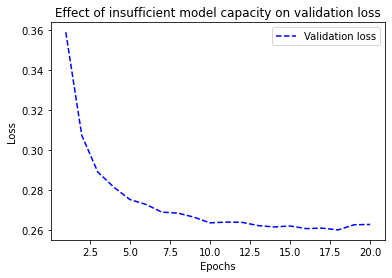

In [28]:
# 손실곡선
import matplotlib.pyplot as plt

val_loss=history_small_model.history["val_loss"]
epochs = range(1,21)
plt.plot(epochs, val_loss, "b--",
        label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [31]:
# 96개의 유닛을 가진 2개의 중간층으로 구성되어 용량이 더 큰 모델을 훈련
model= keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
history_large_model= model.fit(
    train_images, train_labels,
    epochs=20, 
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3522 - accuracy: 0.9005 - val_loss: 0.1983 - val_accuracy: 0.9426
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1579 - accuracy: 0.9535 - val_loss: 0.1315 - val_accuracy: 0.9617
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1119 - accuracy: 0.9669 - val_loss: 0.1198 - val_accuracy: 0.9629
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9736 - val_loss: 0.1003 - val_accuracy: 0.9699
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9790 - val_loss: 0.1013 - val_accuracy: 0.9687
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0565 - accuracy: 0.9831 - val_loss: 0.0964 - val_accuracy: 0.9728
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0462 - accuracy: 0.9857 - val_loss: 0.0952 - val_accuracy: 0.9741
Epoch 

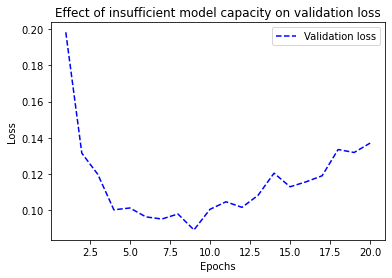

In [32]:
# 손실곡선
import matplotlib.pyplot as plt

val_loss=history_large_model.history["val_loss"]
epochs = range(1,21)
plt.plot(epochs, val_loss, "b--",
        label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 5.4 일반화 성능 향상하기
- 데이터가 충분한지 확인, 입력에서 출력을 매치아는 공간을 조밀하게 샘플링해야 함. 데이터가 많을수록 좋은 모델이 만들어짐
- 레이블 할당 에러를 최소화. 입력을 시각화 하여 이상치를 확인하고 레이블을 교정.
- 데이터를 정제하고 누력된 값을 처리
- 특성중에 어떤 것이 유용한지 확실하지 않으면 특성 선택을 수행

## 5.4.2 특성공학
- 모델에 데이터를 주입하기 전에(학습이 아닌)하드코딩 된 변환을 적용하여 알고리즘이 더 잘 수행되도록 만들어줌

## 5.4.3 조기종료 사용하기(early stopping)
- 훈련 중 일반화 성능이 가장 높은 정확한 최적적합의 지점(과소적합과 과대적합 사이의 정확한 경계)을 찾는 것은 일반화 성능을 향상시킬 수 있는 가장 효과적인 방법 중 하나다.

## 5.4.4 모델 규제하기
목적: 모델의 검증 점수를 향상시키는 것
- 과대적합을 완화시키는 가장 간단한 방법은 모델 크기(층의 수와 층에 있는 유닛 개수로 결정되는 학습 가능한 파라미터 개수)를 줄이는 것.
- 너무 많은 용량과 충분하지 않은 용량 사이의 절충점을 찾아야 한다.

In [20]:
# 5-10 원본 모델
import numpy as np
import keras

from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_original = model.fit(train_data, train_labels,
                          epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5336 - accuracy: 0.7891 - val_loss: 0.4022 - val_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3228 - accuracy: 0.9017 - val_loss: 0.3134 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2326 - accuracy: 0.9251 - val_loss: 0.2915 - val_accuracy: 0.8858
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1841 - accuracy: 0.9405 - val_loss: 0.2724 - val_accuracy: 0.8917
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1505 - accuracy: 0.9519 - val_loss: 0.2769 - val_accuracy: 0.8905
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1243 - accuracy: 0.9615 - val_loss: 0.2896 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1044 - accuracy: 0.9682 - val_loss: 0.3042 - val_accuracy: 0.8858
Epoch 8/20
30

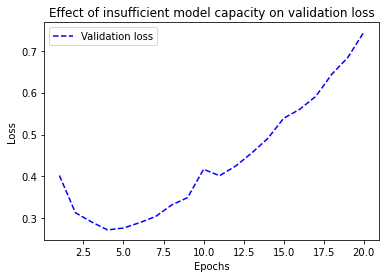

In [26]:
# hist_original plt

import matplotlib.pyplot as plt

val_loss=hist_original.history["val_loss"]
epochs = range(1,21)
plt.plot(epochs, val_loss, "b--",
        label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [32]:
# 5-11 작은 용량의 모델 # 더 작은 모델
model= keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])
hist_smaller_model= model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6682 - accuracy: 0.6319 - val_loss: 0.6286 - val_accuracy: 0.8290
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.5876 - accuracy: 0.7781 - val_loss: 0.5795 - val_accuracy: 0.6924
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.5351 - accuracy: 0.8156 - val_loss: 0.5351 - val_accuracy: 0.8138
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4938 - accuracy: 0.8579 - val_loss: 0.5052 - val_accuracy: 0.8499
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4554 - accuracy: 0.8899 - val_loss: 0.4724 - val_accuracy: 0.8689
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4131 - accuracy: 0.9139 - val_loss: 0.4380 - val_accuracy: 0.8706
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3661 - accuracy: 0.9308 - val_loss: 0.3958 - val_accuracy: 0.8873
Epoch 8/20
30

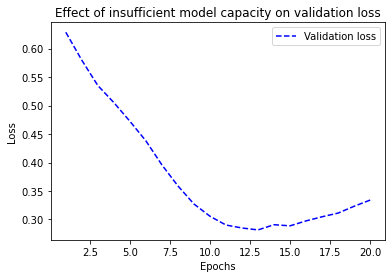

In [33]:
#hist_smaller_model plt
import matplotlib.pyplot as plt

val_loss=hist_smaller_model.history["val_loss"]
epochs = range(1,21)
plt.plot(epochs, val_loss, "b--",
        label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [36]:
# 5-12 큰 용량의 모델
model = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 76ms/step - loss: 0.5414 - accuracy: 0.7571 - val_loss: 0.2943 - val_accuracy: 0.8856
Epoch 2/20
30/30 [==============================] - 2s 66ms/step - loss: 0.2411 - accuracy: 0.9060 - val_loss: 0.3669 - val_accuracy: 0.8425
Epoch 3/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1550 - accuracy: 0.9390 - val_loss: 0.2898 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 2s 66ms/step - loss: 0.0743 - accuracy: 0.9748 - val_loss: 0.3523 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 2s 66ms/step - loss: 0.0117 - accuracy: 0.9972 - val_loss: 1.0808 - val_accuracy: 0.7777
Epoch 6/20
30/30 [==============================] - 2s 66ms/step - loss: 0.0677 - accuracy: 0.9802 - val_loss: 0.5130 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 2s 66ms/step - loss: 6.5698e-04 - accuracy: 1.0000 - val_loss: 0.6331 - val_accuracy: 0.8879
Epoch 8/2

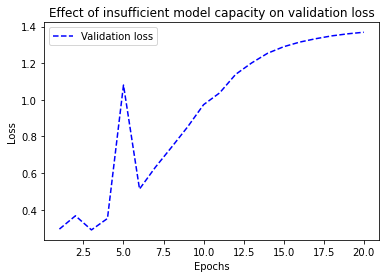

In [39]:
#hist_larger_model plt
import matplotlib.pyplot as plt

val_loss=hist_larger_model.history["val_loss"]
epochs = range(1,21)
plt.plot(epochs, val_loss, "b--",
        label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [38]:
# 5-13 모델에 l2가중치 추가하기

# l2(0.002)는 가중치 행렬의 모든 원소를 제곱하고 0.002를 곱해 모델 전체 손실에 더해진다는 의미.

from tensorflow.keras import regularizers
model = keras.Sequential([
  layers.Dense(16,
               kernel_regularizer=regularizers.l2(0.002),
               activation='relu'),
  layers.Dense(16,
               kernel_regularizer=regularizers.l2(0.002),
               activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5937 - accuracy: 0.7799 - val_loss: 0.4639 - val_accuracy: 0.8753
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4037 - accuracy: 0.8950 - val_loss: 0.3927 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3385 - accuracy: 0.9132 - val_loss: 0.3653 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3039 - accuracy: 0.9250 - val_loss: 0.3683 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2831 - accuracy: 0.9314 - val_loss: 0.3548 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2686 - accuracy: 0.9369 - val_loss: 0.3563 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2587 - accuracy: 0.9399 - val_loss: 0.3943 - val_accuracy: 0.8703
Epoch 8/20
30

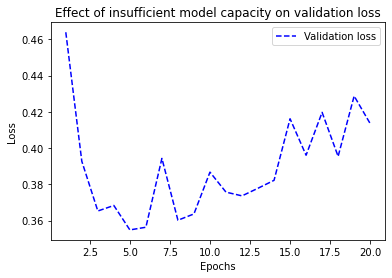

In [41]:
#hist_l2_reg  plt
import matplotlib.pyplot as plt

val_loss=hist_l2_reg .history["val_loss"]
epochs = range(1,21)
plt.plot(epochs, val_loss, "b--",
        label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [48]:
#5-14 케라스에서 사용할 수 있는 가중치 규제
from keras import regularizers
regularizers.l1(0.001) #l1규제
regularizers.l1_l2(l1=0.001, l2=0.001) #l1, l2규제=> 엘라스틴넷

In [49]:
### 드롭아웃 추가- 과적합 규제 방법(빼낸다, 탈락시킨다)
- 모델에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 출력 특성을 일부 제외시킵니다.(0으로 만듭니다.)

In [ ]:
# 훈련할 때 유닛의 출력 중 50%를 버린다.
layer_ouptput *=np.random.randint(0, high=2, size=layer_ouptput.shape)

In [ ]:
# 테스트 단계
layer_ouput*=0.5

In [ ]:
# 훈련단계
layer_output*=np.random.randint(0,high=2, size=layer_output.shape)
layer_output/=0.5  #여기서 스케일을 낮추는 대신 높인다.

In [52]:
# 5-15 IMDB모델에 드롭아웃 추가하기
model= keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])
history_dropout=model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6414 - accuracy: 0.6295 - val_loss: 0.5331 - val_accuracy: 0.8417
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5318 - accuracy: 0.7543 - val_loss: 0.4399 - val_accuracy: 0.8720
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4552 - accuracy: 0.8195 - val_loss: 0.3866 - val_accuracy: 0.8743
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3935 - accuracy: 0.8584 - val_loss: 0.3358 - val_accuracy: 0.8813
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3403 - accuracy: 0.8823 - val_loss: 0.3016 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3014 - accuracy: 0.9018 - val_loss: 0.2859 - val_accuracy: 0.8902
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2659 - accuracy: 0.9159 - val_loss: 0.2812 - val_accuracy: 0.8913
Epoch 8/20
30

# 7. 케라스 완전 정복

## 7.1 다양한 워크플로
- 케라스 API 설계는 복잡성의 단계적공개 원칙을 따른다.
- 단계마다 점진적으로 학습하여 아주 복잡한 경우를 처리 가능

## 7.2 케라스 모델을 만드는 여러 방법
# 케라스 모델을 만드는 API 3가지
- Sequential모델: 가장 시작하기 쉬운 api. 기본적으로 하나의 파이썬 리스트. 단순히 층을 쌓을 수만 있음 
- 함수형 API(Function API): 그래프 같은 모델 구조. api는 사용성과 유연성 사이의 적절한 중간 지점에 해당. 가장 널리 사용되는 모델 구축 api임
- Model 서브클래싱(subclassing)은 모든 것을 밑바닥부터 직접 만들 수 있는 저수준 방법. 모든 상세 내용을 완전히 제어하고 싶은 경우에 적합.
    하지만 여러 케라스 내장 기능을 사용하지 못하기 때문에 실수 발생 위험이 많음

In [1]:
##7.2.1 Sequential모델
# 7-1 Sequential클래스
from tensorflow import keras
from tensorflow.keras import layers

model= keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [2]:
# 7-2 점진적으로 Sequential모델 만들기
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [3]:
# 입력 크기를 알기 전까지 가중치를 만들 수 없다.
# 따라서 앞의 Sequential 모델은 어떤 가중치도 갖고 있지 않다.
# 가중치를 생성하려면 어떤 데이터로 호출 하거나 입력 크기를 지정하여 build()메서드를 호출 해야 함

# 7-3 build()메서드가 호출 전의 모델은 가중치가 없다.
model.weights

ValueError: Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [4]:
# 7-4 가중치를 만들기 위해 모델을 호출한다
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 5.54013550e-02, -1.63440764e-01,  2.92796791e-01,
          6.10870123e-03,  2.07082331e-01,  2.21437037e-01,
         -2.81252146e-01,  7.50323832e-02,  1.67769641e-01,
          1.22062534e-01, -3.08485627e-02, -4.25025225e-02,
          6.13416731e-02, -1.62874758e-02,  2.19540775e-01,
         -1.24314189e-01, -1.11127898e-01, -3.07611525e-02,
         -1.14691213e-01, -2.68762618e-01, -1.77366495e-01,
          1.32235318e-01, -2.84326434e-01, -2.11428702e-02,
          1.04939312e-01,  5.05891144e-02, -1.26881778e-01,
         -8.92292410e-02, -2.01236904e-02, -2.23405138e-01,
         -2.82045454e-01, -1.48974925e-01, -1.01473033e-02,
          4.40212190e-02,  2.90680289e-01,  1.12232924e-01,
         -2.49901012e-01, -2.45012045e-02, -2.25866914e-01,
         -2.15792447e-01,  2.82935679e-01,  1.54017687e-01,
         -2.83726901e-01,  6.13123477e-02, -1.79123998e-01,
          1.76679850e-01, -1.14

In [5]:
# 7-5 Summary()메서드
model.summary()


# 256개가 나온 이유는: (3+1)*64를 했기 때문. 1개가 더해진 것은 : bias(편향)
# 650개가 나온 이유는: (64+1)*10   1개가 더해진 것은 : bias(편향)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 7-6 name매개변수로 모델과 층에 이름 지정하기
model= keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Sequntial모델을 점진적으로 만들 때 층을 추가하고 난 후 Summary()메서드를 호출하여 현재 모델을 확인할 수 있으면 유용.
# 하지만 모델의 build()메서드를 호출하기 전 까지는 summary() 메서드를 호출할수 없음
# Sequntial모델의 가중치를 바로 생성하즌 방법이 모델의 입력 크기를 미리 지정하면 됨=> Input메서드 사용

In [10]:
# 7-7 모델의 입력 크기를 미리 지정하기
model= keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [12]:
model.summary()

# summary()메서드를 사용하여 층을 추가함에 따라 모델의 출력 크기 변화를 확인할 수 있음

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
Total params: 1,016
Trainable params: 1,016
Non-trainable params: 0
_________________________________________________________________


## 7.2.2 함수형 API
- Sequntial모델은 사용하기 쉽지만 적용이 제한적이다.
- 하나의 입력과 하나의 출력만 가지며 순서대로 층을 쌓는 모델에만 표현 가능

In [15]:
# 7-8 2개의 Dense층을 가진 간단한 함수형 모델
inputs= keras.Input(shape=(3,), name="my_input")  # Input클래스를 정의, 이름 지정
features = layers.Dense(64, activation="relu")(inputs) 
outputs= layers.Dense(10, activation= "softmax")(features)
model = keras.Model(inputs= inputs, outputs= outputs)

In [20]:
inputs= keras.Input(shape=(3,), name="my_input")
print(inputs.shape)   # 이 모델은 각 샘플의 크기가 (3,)인 배치를 처리. 배치당 샘플의 갸수는 가변적이다. 배치의 크기가 None으로 지정됨
print(inputs.dtype)  # 이 배치는 dtype이 float32이다.


# 이런 객체를 심볼릭 텐서 라고 부른다.
# 실제 데이터를 가지고 있지 않지만 사용할 때 모델이 보게 될 데이터 텐서의 사양이 인코딩되었다.
# 즉 미래의 데이터 텐서를 나타냄

(None, 3)
<dtype: 'float32'>


In [22]:
features = layers.Dense(64, activation="relu")(inputs)

# 층을 만들고 입력을 호출

In [23]:
# 모든 케라스 층은 실제 데이터 텐서나 심볼릭 텐서로 호출할 수 있다.
features.shape

TensorShape([None, 64])

In [25]:
# 최종 출력을 얻은 후 입력과 출력 Model클래스에 전달하여 모델 객체를 생성.
outputs= layers.Dense(10, activation="softmax")(features)
model= keras.Model(inputs= inputs, outputs=outputs)

In [26]:
# summary()메서드 호출 결과
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_10 (Dense)            (None, 64)                256       
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## 다중 입력, 다중 호출
- 입력이 여러개이거나 출력이 여러개

-- 고객 이슈 티켓에 우선순위를 지정하고 적절한 부서로 전달하는 시스템을 만들기
- 이슈 티켓의 제목(텍스트 입력)
- 이슈 티켓의 텍스트 본문(텍스트 입력)
- 사용자가 추가한 태그(범주형 입력으로 여기에서는 원-핫 인코딩)

-- 텍스트 입력을 크기가 vocabulary_size인 0과 1로 이루어진 배열로 인코딩 할 수 있다.
- 이 모델은 출력도 2개 이다.
- 이슈 티켓의 우선순위 점수로 0과 1사이의 스칼라(시그모이드 출력)
- 이슈 티켓을 처리해야 할 부서(전체 부서 집합에 대한 소프트맥스 출력)

In [53]:
# 7-9 다중입력, 다중출력 함수형 모델
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")  #입력이 3개임

features = layers.Concatenate()([title, text_body, tags]) # 3개의 입력을 하나로 묶음
features = layers.Dense(64, activation="relu")(features)# 중간 층을 적용하여 입력 특성을 더 풍부한 표현으로 재결합시킴

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)#모델의 출력을 정의1
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features) #모델의 출력을 정의2

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])   #입력과 호출을 지정하여 모델을 만듦

### 다중 입력, 다중 출력 모델 훈련하기
- 입력과 출력 데이터의 리스트로 fit()메서드를 호출하면 됨
- 데이터의 리스트는 Model클래스에 전달한 순서와 같아야함

In [54]:
# 7-10 입력과 타깃 배열 리스트를 전달하여 모델 훈련하기
import numpy as np

num_samples= 1280

# 더미(dummy)입력 데이터  input
title_data= np.random.randint(0,2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0,2,size=(num_samples, vocabulary_size))
tags_data= np.random.randint(0,2, size=(num_samples, num_tags))

# 더미 타깃 데이터   y
priority_data= np.random.random(size=(num_samples, 1))
department_data= np.random.randint(0,2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
             loss=["mean_squared_error", "categorical_crossentropy"],   #input함수가 2개 들어가서 loss(손실함수)도 2개 들어가야 함
             metrics=[["mean_absolute_error"], ["accuracy"]])    #평가지표

model.fit([title_data, text_body_data, tags_data],     # x값
         [priority_data, department_data], epochs=1)   # y값

model_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data])  #예측값에 x를 넣고 예측을 하면 y값이 나옴, 비교를 함

40/40 [==============================] - 0s 3ms/step


In [55]:
# 1:1 대응으로 이름 지정해주기=> 순서를 안지켜도 됨
# 7-11 입력과 타깃 배열을 딕셔너리로 전달하여 모델 훈력하기
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})

model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)

model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 3ms/step


###함수형 api의 장점: 층 연결 구조 활용하기
- 함수형 모델은 명시적인 그래츠 구조인다.
- 층이 어떻게 연결되어있는지 조사하고 이전 그래프 노드(층의 출력)를 새 모델의 일부로 재사용할 수 있다.

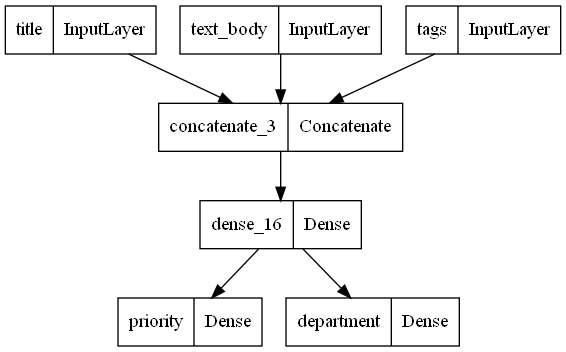

In [57]:
# 시각화 해보기
keras.utils.plot_model(model, "ticket_classifier.png")


# input이 3개
# 2번째, 3째는 layer
# 마지막은 output

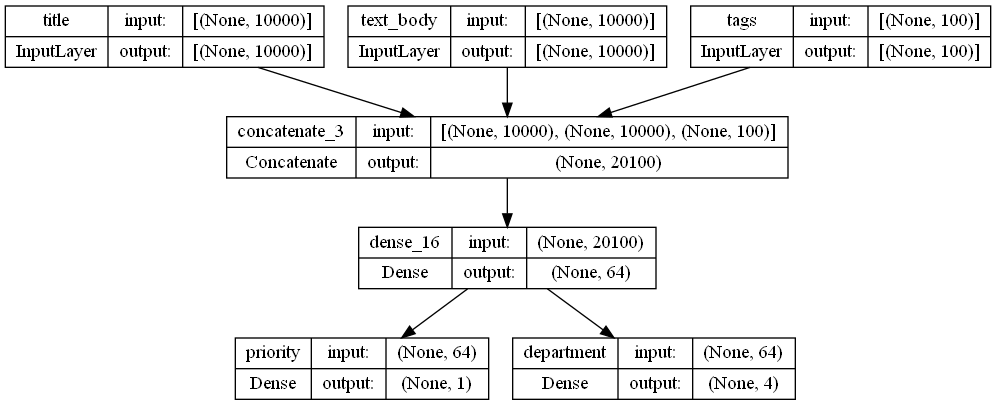

In [61]:
# 모델에 있는 각 층의 입출력 크기를  그림에 추가하면 디버깅에 도움이 될 수 있다.
# 크기 정보가 출력된 모델 그림
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes= True)

In [63]:
# 7-12 함수형 모델에 있는 층의 입력과 출력을 출력하기
model.layers

In [64]:
# 이를 통해 특성 추출을 수행하여 다른 모델에서 중간 특성을 재사용하는 모델을 만들 수 있다.

In [68]:
# 7-13 중간 층의 출력을 재사용해서 새로운 모델 만들기
features= model.layers[4].output  #layers[4]는 중간 Dense층임
difficulty= layers.Dense(3, activation="softmax", name= "difficulty")(features)
new_model= keras.Model(
    inputs=[title, text_body, tags],
    outputs= [priority, department, difficulty])

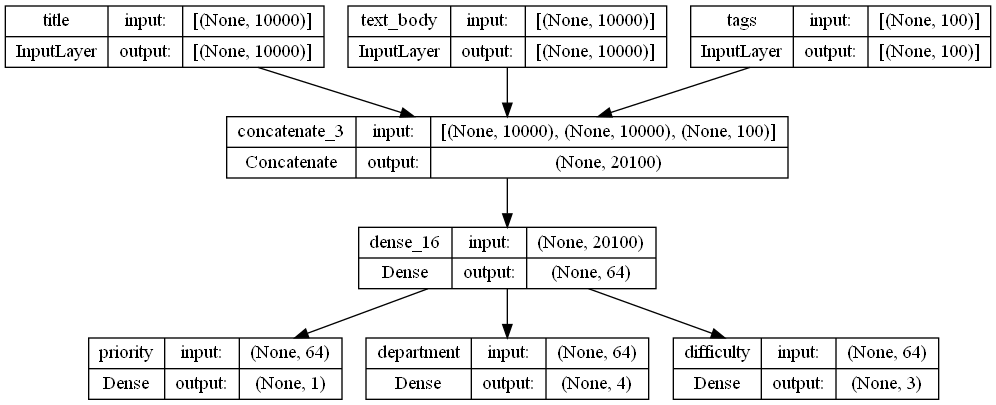

In [69]:
# 새로운 모델을 그래프로 출력
keras.utils.plot_model(
    new_model, "update_ticket_classifier.png", show_shapes=True)

# 8. 컴퓨터 비전을 위한 딥러닝

## 8.1 합성곱 신경망

In [47]:
# 8-1 간단한 커브넷 만들기
from tensorflow import keras
from tensorflow.keras import layers

In [55]:
inputs= keras.Input(shape=(28,28,1))
x= layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x= layers.MaxPooling2D(pool_size=2)(x)
x= layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x= layers.Flatten()(x)
outputs= layers.Dense(10, activation="softmax")(x)
model=keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# 컨브넷이 배치차원을 제외하고 (image_height, image_width, image_channels)크기의 입력 텐서를 사용한다는 점이 중요.
# 이 예제는 mnist이미지 포맷인 (28,28,1)크기의 입력을 처리하도록 컨브넷을 설정해야 함

In [56]:
# 컨브넷의 구조를 출력
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 32)          9248

In [57]:
# 높이와 너비 차원은 모델이 깊어질수록 작아지는 경향이 있다.
# 채널의 수는 Conv2D 층에 전달 된 첫번째 매개변수에 의해 조절됨

In [58]:
# 8-3 MNIST이미지에서 컨브넷 훈련하기
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28,28,1))
test_images= test_images.astype("float32")/255
model.compile(optimizer="rmsprop",
             loss= "sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 12s 12ms/step - loss: 0.2262 - accuracy: 0.9311
Epoch 2/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0687 - accuracy: 0.9787
Epoch 3/5
938/938 [==============================] - 10s 11ms/step - loss: 0.0488 - accuracy: 0.9849
Epoch 4/5
938/938 [==============================] - 11s 11ms/step - loss: 0.0385 - accuracy: 0.9883
Epoch 5/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0329 - accuracy: 0.9898


In [59]:
# 8-4 컨브넷 평가하기
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도:{test_acc:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0346 - accuracy: 0.9886
테스트 정확도:0.989


In [ ]:
## 8.1.1 합성곱 연산
핵심 특징은 컨브넷에 두가지 흥미로운 성질을 제공
- 학습된 패턴은 평행이동 불변성을 가진다.
    컨브넷이 이미지의 오른쪽 아래 모서리에서 어떤 패턴을 학습했다면 다른곳에서도 이 패턴을 인식할 수 있다.
    완전 연결 네트워크는 새로운 위치에 나타난 것은 새로운 패턴으로 학습해야 한다. 이런 성질은 컨브넷이 이미지를 효율적으로 처리하게 만들어 준다.
    적은 수의 훈련 샘플을 사용해서 일반화 능력을 가진 표현을 학습할 수 있다.
    = 근본적으로 우리가 보는 세상은 평행이동으로 인해 다르게 인식되지 않습니다.
- 컨브넷은 패턴의 공간적 계층 구조를 학습할 수 있다.
    1. 합성곱 층이 에비 같은 작은 지역 패턴을 학습한다.
    2. 합성곱 층은 첫번째 층의 특성으로 구성된 더 큰 패턴을 학습하는 식이다.
    이런 방식을 사용하여 컨브넷은 매우 복잡, 추상적인 시각적 개념을 효과적으로 학습할 수 있다.
    =근본적으로 우리가 보는 세상은 공간적 계층구조를 가지고 있기 때문
- 합성곱연산은 특성맵이라고 부르는 랭크-3텐서에 적용된다.

In [ ]:
특성맵이란 말이 의미하는 것은 깊이 축에 있는 각 차원은 하나의 특성(또는 필터)이고, 랭크-2 텐서인 output[:,:,n]은 입력에 대한 이 필터 응답을 나타내는 2D공간상의 맵이다.

In [ ]:
합성곱은 핵심적으로 2개의 파라미터로 정의됨
- 입력으로부터 뽑아낼 패치의 크기: 전형적으로 3x3 또는 5x5크기를 사용
- 특성 맵의 출력 깊이: 합성곱으로 계산할 필터 개수. ex)32~128

In [ ]:
케라스의 Con2D 층에서 이 파라미터는 Con2D(output_depth, (window_height, window_width))처럼 첫번째와 두번째 매개변수로 전달됨.

-합성곱 커널(convolution kernel)
3D입력 특성 맵 위를 3x3 또는 5x5크기의 윈도우가 슬라이딩 하면 모든 위치에서 3D특성 패치를 추출하는 방식으로 합성곱이 작동함.
하나의 학습된 가중치 행렬과 텐서 곱셈을 통해 크기의 1D벡터로 변환됨.
동일한 커널이 모든 패치에 걸쳐 재사용됨


In [ ]:
패딩: 입력과 동일한 높이와 너비를 가진 출력 특성 맵을 얻고싶을 때 사용
패딩은 입력 특성 맵의 가장자리에 적절한 개수의 행과 열을 추가함.
그래서 모든 입력 타일에 합성곱 윈도우의 중앙을 위치시킬 수 있음
3x3 윈도우라면 위아래에 하나의 행을 추가하고 오른쪽, 왼쪽에 하나의 열을 추가한다.
5x5윈도우라면 2개의 행과 열을 추가한다.

In [ ]:
이미지 -> 숫자배열....784>>>1
이미지 -> 이미지 숫자(28,28,1)>>>숫자배열>>>>1
(가로28, 세로28, 흑백1)

dnn: 숫자를 보고 숫자를 맞추는 것 (숫자->1)
cnn: 이미지를 보고 dnn의 논리를 거치는 것(이미지->숫자->1)(이미지->dnn)

In [ ]:
element-wise: 곱해서 더한다

5x5를 훑고 가면 3x3이 나옴.

아홉가지의 숫자를 나타내는 숫자=9
한칸 이동한 숫자를 나타내는 숫자=101
2   0   5    0                   9    101   0      
1   2   100  0              =>   0     0    0
2   1   5    0                   0     0    0



0 0 1
0 1 0
1 0 0

convolution계산
컨블르션 연산=> 바깥을 0000으로 둘러싸서 2개의 row, 2개의 칼럼이 더 생기게 됨 = =패딩(Padding)
(마진: 바깥 여백, 패딩: 안쪽 여백)인데
패딩: 바깥쪽 여백을 둘러싸는 것임.

패딩이 뭔지 설명할 줄 알아야함

위의 아홉가지의 숫자를 나타내는 숫자=9
5+2+2=9

한칸 이동하면 
100+1=101


Conv2D레이어를 한번 통과하면 5x5가 3x3으로 바뀜
또 통과시키면 3x3이 1x1으로 줄어듬


